In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter

In [307]:
# importing data
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head(7)

(136950, 6)


id        date    country         store  \
0   0  2017-01-01  Argentina  Kaggle Learn   
1   1  2017-01-01  Argentina  Kaggle Learn   
2   2  2017-01-01  Argentina  Kaggle Learn   
3   3  2017-01-01  Argentina  Kaggle Learn   
4   4  2017-01-01  Argentina  Kaggle Learn   
5   5  2017-01-01  Argentina  Kaggle Store   
6   6  2017-01-01  Argentina  Kaggle Store   

                                          product  num_sold  
0               Using LLMs to Improve Your Coding        63  
1                   Using LLMs to Train More LLMs        66  
2  Using LLMs to Win Friends and Influence People         9  
3      Using LLMs to Win More Kaggle Competitions        59  
4                      Using LLMs to Write Better        49  
5               Using LLMs to Improve Your Coding        88  
6                   Using LLMs to Train More LLMs        98

In [3]:
test_data = pd.read_csv('test.csv')
test_data

id        date    country         store  \
0      136950  2022-01-01  Argentina  Kaggle Learn   
1      136951  2022-01-01  Argentina  Kaggle Learn   
2      136952  2022-01-01  Argentina  Kaggle Learn   
3      136953  2022-01-01  Argentina  Kaggle Learn   
4      136954  2022-01-01  Argentina  Kaggle Learn   
...       ...         ...        ...           ...   
27370  164320  2022-12-31      Spain     Kagglazon   
27371  164321  2022-12-31      Spain     Kagglazon   
27372  164322  2022-12-31      Spain     Kagglazon   
27373  164323  2022-12-31      Spain     Kagglazon   
27374  164324  2022-12-31      Spain     Kagglazon   

                                              product  
0                   Using LLMs to Improve Your Coding  
1                       Using LLMs to Train More LLMs  
2      Using LLMs to Win Friends and Influence People  
3          Using LLMs to Win More Kaggle Competitions  
4                          Using LLMs to Write Better  
...                                               ...  
27370               Using LLMs to Improve Your Coding  
27371                   Using LLMs to Train More LLMs  
27372  Using LLMs to Win Friends and Influence People  
27373      Using LLMs to Win More Kaggle Competitions  
27374                      Using LLMs to Write Better  

[27375 rows x 5 columns]

# Data Exploration

In [308]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [5]:
# check null values
train_data.isna().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [6]:
# check duplicates for non-id columns
train_data.drop('id',axis=1).duplicated().sum()

0

In [7]:
# statistical descriptions of all columns
train_data.describe(include='all')

C:\Users\Brian\AppData\Local\Temp/ipykernel_36376/2982739048.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_data.describe(include='all')


id                 date    country         store  \
count   136950.00000               136950     136950        136950   
unique           NaN                 1826          5             3   
top              NaN  2017-01-01 00:00:00  Argentina  Kaggle Learn   
freq             NaN                   75      27390         45650   
first            NaN  2017-01-01 00:00:00        NaN           NaN   
last             NaN  2021-12-31 00:00:00        NaN           NaN   
mean     68474.50000                  NaN        NaN           NaN   
std      39534.20402                  NaN        NaN           NaN   
min          0.00000                  NaN        NaN           NaN   
25%      34237.25000                  NaN        NaN           NaN   
50%      68474.50000                  NaN        NaN           NaN   
75%     102711.75000                  NaN        NaN           NaN   
max     136949.00000                  NaN        NaN           NaN   

                                  product       num_sold  
count                              136950  136950.000000  
unique                                  5            NaN  
top     Using LLMs to Improve Your Coding            NaN  
freq                                27390            NaN  
first                                 NaN            NaN  
last                                  NaN            NaN  
mean                                  NaN     165.522636  
std                                   NaN     183.691575  
min                                   NaN       2.000000  
25%                                   NaN      46.000000  
50%                                   NaN      98.000000  
75%                                   NaN     184.000000  
max                                   NaN    1380.000000

In [8]:
print('Countries in dataset: ',set(train_data['country']))

Countries in dataset:  {'Argentina', 'Japan', 'Canada', 'Estonia', 'Spain'}


In [9]:
pd.set_option('display.max_rows', 100)
print(train_data.groupby(['country','store','product'])['date'].count())
print("# of days in 5 years:", 365 * 5 + 1)

country    store         product                                       
Argentina  Kagglazon     Using LLMs to Improve Your Coding                 1826
                         Using LLMs to Train More LLMs                     1826
                         Using LLMs to Win Friends and Influence People    1826
                         Using LLMs to Win More Kaggle Competitions        1826
                         Using LLMs to Write Better                        1826
           Kaggle Learn  Using LLMs to Improve Your Coding                 1826
                         Using LLMs to Train More LLMs                     1826
                         Using LLMs to Win Friends and Influence People    1826
                         Using LLMs to Win More Kaggle Competitions        1826
                         Using LLMs to Write Better                        1826
           Kaggle Store  Using LLMs to Improve Your Coding                 1826
                         Using LLMs to Train Mor

Count of sales for all products in each store and country are equal. Number of sold always positive with 2 as minimum.

In [18]:
group_df = train_data.groupby(['product']).num_sold.mean()
# group_df['Kagglazon:Kaggle Learn'] = group_df['Kagglazon'] / group_df['Kaggle Learn']
# group_df['Kagglazon:Kaggle Store'] = group_df['Kagglazon'] / group_df['Kaggle Store']
# group_df['Kaggle Store:Kaggle Learn'] = group_df['Kaggle Store'] / group_df['Kaggle Learn']
group_df

product
Using LLMs to Improve Your Coding                 221.587477
Using LLMs to Train More LLMs                     218.838080
Using LLMs to Win Friends and Influence People     34.047609
Using LLMs to Win More Kaggle Competitions        185.042461
Using LLMs to Write Better                        168.097554
Name: num_sold, dtype: float64

In [10]:
train_data.drop(['id','date'],axis=1).groupby(['country','store','product']).agg(['min','max','mean'])

num_sold  \
                                                                           min   
country   store        product                                                   
Argentina Kagglazon    Using LLMs to Improve Your Coding                    67   
                       Using LLMs to Train More LLMs                        85   
                       Using LLMs to Win Friends and Influence People       12   
                       Using LLMs to Win More Kaggle Competitions           65   
                       Using LLMs to Write Better                           64   
          Kaggle Learn Using LLMs to Improve Your Coding                    12   
                       Using LLMs to Train More LLMs                        15   
                       Using LLMs to Win Friends and Influence People        2   
                       Using LLMs to Win More Kaggle Competitions           11   
                       Using LLMs to Write Better                           11   
          Kaggle Store Using LLMs to Improve Your Coding                    18   
                       Using LLMs to Train More LLMs                        23   
                       Using LLMs to Win Friends and Influence People        3   
                       Using LLMs to Win More Kaggle Competitions           17   
                       Using LLMs to Write Better                           17   
Canada    Kagglazon    Using LLMs to Improve Your Coding                   356   
                       Using LLMs to Train More LLMs                       419   
                       Using LLMs to Win Friends and Influence People       65   
                       Using LLMs to Win More Kaggle Competitions          334   
                       Using LLMs to Write Better                          315   
          Kaggle Learn Using LLMs to Improve Your Coding                    65   
                       Using LLMs to Train More LLMs                        78   
                       Using LLMs to Win Friends and Influence People       11   
                       Using LLMs to Win More Kaggle Competitions           57   
                       Using LLMs to Write Better                           57   
          Kaggle Store Using LLMs to Improve Your Coding                    93   
                       Using LLMs to Train More LLMs                       121   
                       Using LLMs to Win Friends and Influence People       18   
                       Using LLMs to Win More Kaggle Competitions           91   
                       Using LLMs to Write Better                           87   
Estonia   Kagglazon    Using LLMs to Improve Your Coding                   175   
                       Using LLMs to Train More LLMs                       224   
                       Using LLMs to Win Friends and Influence People       36   
                       Using LLMs to Win More Kaggle Competitions          176   
                       Using LLMs to Write Better                          163   
          Kaggle Learn Using LLMs to Improve Your Coding                    34   
                       Using LLMs to Train More LLMs                        39   
                       Using LLMs to Win Friends and Influence People        6   
                       Using LLMs to Win More Kaggle Competitions           31   
                       Using LLMs to Write Better                           29   
          Kaggle Store Using LLMs to Improve Your Coding                    52   
                       Using LLMs to Train More LLMs                        65   
                       Using LLMs to Win Friends and Influence People        9   
                       Using LLMs to Win More Kaggle Competitions           48   
                       Using LLMs to Write Better                           44   
Japan     Kagglazon    Using LLMs to Improve Your Coding                   322   
                       Using LLMs to Train More LLMs

In [15]:
group_df = train_data.groupby(['country', 'store', 'product']).num_sold.mean().unstack(level='store')
group_df['Kagglazon:Kaggle Learn'] = group_df['Kagglazon'] / group_df['Kaggle Learn']
group_df['Kagglazon:Kaggle Store'] = group_df['Kagglazon'] / group_df['Kaggle Store']
group_df['Kaggle Store:Kaggle Learn'] = group_df['Kaggle Store'] / group_df['Kaggle Learn']
group_df.iloc[:,3:]

store                                                     Kagglazon:Kaggle Learn  \
country   product                                                                  
Argentina Using LLMs to Improve Your Coding                             5.718019   
          Using LLMs to Train More LLMs                                 5.704942   
          Using LLMs to Win Friends and Influence People                6.190101   
          Using LLMs to Win More Kaggle Competitions                    5.731613   
          Using LLMs to Write Better                                    5.747027   
Canada    Using LLMs to Improve Your Coding                             5.660285   
          Using LLMs to Train More LLMs                                 5.657979   
          Using LLMs to Win Friends and Influence People                5.744789   
          Using LLMs to Win More Kaggle Competitions                    5.673000   
          Using LLMs to Write Better                                    5.676823   
Estonia   Using LLMs to Improve Your Coding                             5.671761   
          Using LLMs to Train More LLMs                                 5.682714   
          Using LLMs to Win Friends and Influence People                5.904710   
          Using LLMs to Win More Kaggle Competitions                    5.696241   
          Using LLMs to Write Better                                    5.681733   
Japan     Using LLMs to Improve Your Coding                             5.665801   
          Using LLMs to Train More LLMs                                 5.672836   
          Using LLMs to Win Friends and Influence People                5.790880   
          Using LLMs to Win More Kaggle Competitions                    5.687241   
          Using LLMs to Write Better                                    5.675590   
Spain     Using LLMs to Improve Your Coding                             5.664860   
          Using LLMs to Train More LLMs                                 5.666291   
          Using LLMs to Win Friends and Influence People                5.840211   
          Using LLMs to Win More Kaggle Competitions                    5.674668   
          Using LLMs to Write Better                                    5.688681   

store                                                     Kagglazon:Kaggle Store  \
country   product                                                                  
Argentina Using LLMs to Improve Your Coding                             3.699324   
          Using LLMs to Train More LLMs                                 3.683367   
          Using LLMs to Win Friends and Influence People                3.872191   
          Using LLMs to Win More Kaggle Competitions                    3.711395   
          Using LLMs to Write Better                                    3.701869   
Canada    Using LLMs to Improve Your Coding                             3.676187   
          Using LLMs to Train More LLMs                                 3.676041   
          Using LLMs to Win Friends and Influence People                3.700126   
          Using LLMs to Win More Kaggle Competitions                    3.682257   
          Using LLMs to Write Better                                    3.672393   
Estonia   Using LLMs to Improve Your Coding                             3.678721   
          Using LLMs to Train More LLMs                                 3.680342   
          Using LLMs to Win Friends and Influence People                3.772290   
          Using LLMs to Win More Kaggle Competitions                    3.686543   
          Using LLMs to Write Better                                    3.688115   
Japan     Using LLMs to Improve Your Coding                             3.683466   
          Using LLMs to Train More LLMs                                 3.690182   
          Using LLMs to Win Friends and Influence People                3.717588   
          Using LLMs to Win More Kaggle Competition

On average, Kagglazon sales are **5.7** times higher than Kaggle Learn and **3.7** times higher than Kaggle Store. Meanwhile, Kaggle Store sales are **1.54** times higher than Kaggle Learn.

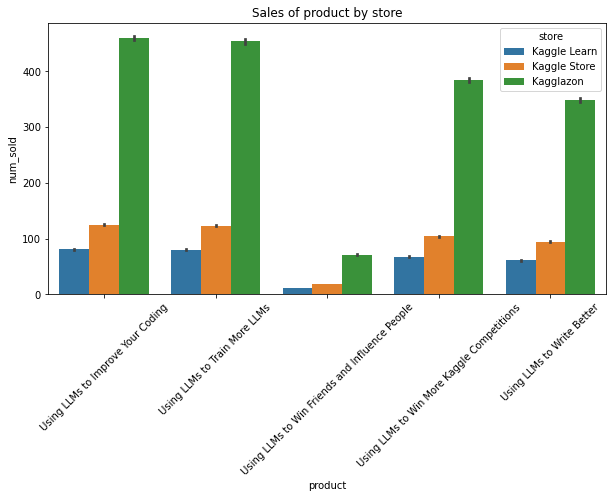

In [137]:
plt.figure(figsize=(8,5))
sns.barplot(data=train_data, x='product',y='num_sold',hue='store')
plt.xticks(rotation=45)
plt.title('Sales of product by store')
plt.show()

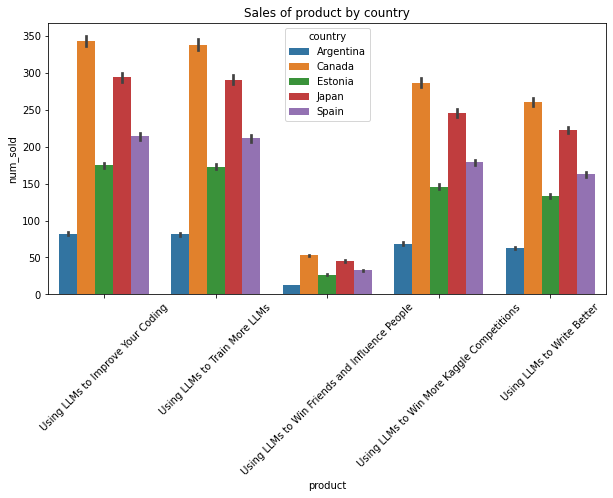

In [136]:
plt.figure(figsize=(12,5))
sns.barplot(data=train_data, x='product',y='num_sold',hue='country')
plt.xticks(rotation=45)
plt.title('Sales of product by country')
plt.show()

Sales in Argentina are the lowest with Highest in Canada. Using LLMs to Win Friends and Influence People product sales are low. Highest is Using LLMs to Improve Your Coding followed closely by Using LLMs to Train More LLMs.

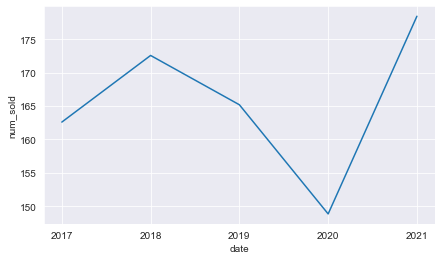

In [31]:
year_df = train_data.drop('id', axis=1).groupby(train_data['date'].dt.year).mean()
plt.figure(figsize=(7,4))
sns.set_style('darkgrid')
ax = sns.lineplot(x=year_df.index, y=year_df.num_sold)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

The year 2020 has the most significant drop due to covid we need to see in which month that the sales has dropped significantly.

## Plotting groups

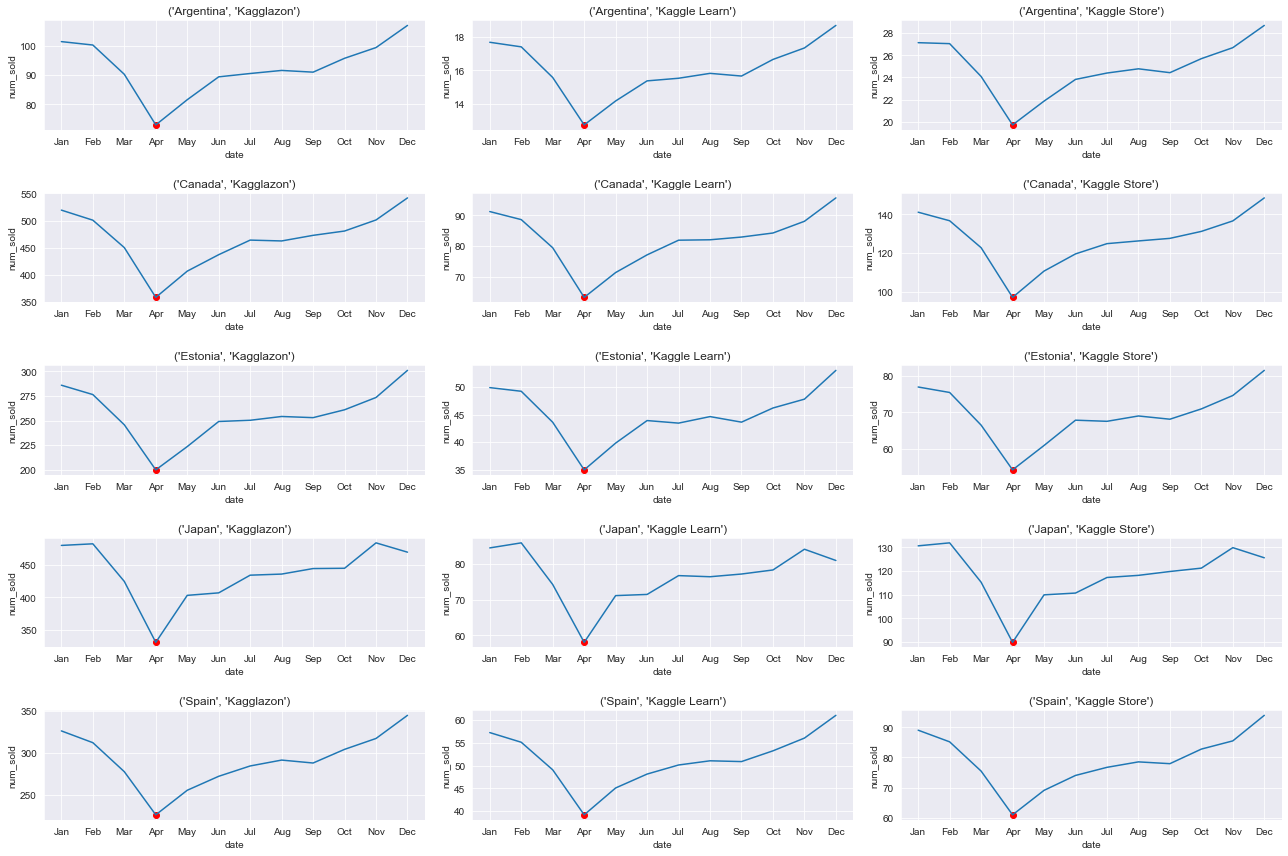

In [309]:
cov_yearDf = train_data.loc[train_data.date.dt.year==2020]
plt.figure(figsize=(18,12))
sns.set_style('darkgrid')
for i, (comb,df) in enumerate(cov_yearDf.groupby(['country','store'])):
    data = cov_yearDf.loc[(cov_yearDf['country']==comb[0])&(cov_yearDf['store']==comb[1])]
    data = data.drop('id', axis=1).groupby(data.date.dt.month).mean()
    low_sales = min(data.num_sold)
    index = data[data.num_sold==low_sales].index
    ax = plt.subplot(5, 3, i+1)
    plot = sns.lineplot(x=data.index, y=data.num_sold)
    plot.scatter(index, low_sales, color='r') # April drop
    plot.set_title(comb)
    plot.set_xticks(range(1,13))
    plot.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout(h_pad=2.0)

In 2020, April has the lowest sales of all months for all stores and countries. I believe that the individual product sales won't change the graph. Country, store, product are independent of sales during covid.

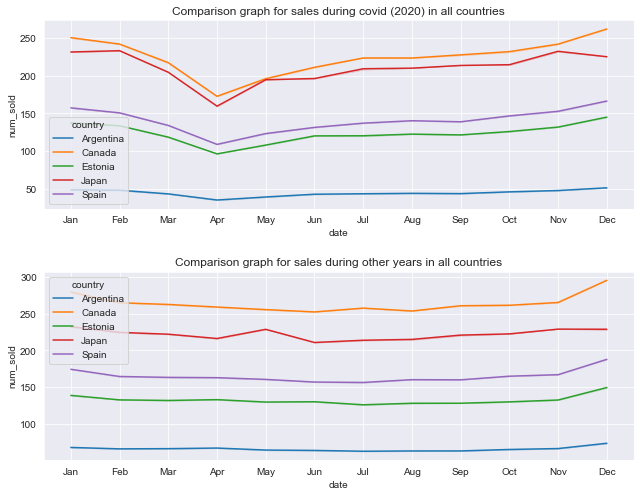

In [322]:
ex_covid = train_data.loc[train_data.date.dt.year!=2020]

fig, ax = plt.subplots(2,1, figsize=(9,7))
plot1=sns.lineplot(data=cov_yearDf,x=cov_yearDf.date.dt.month,y='num_sold',hue='country',ci=False,ax=ax[0])
plot1.set_title('Comparison graph for sales during covid (2020) in all countries')
ax[0].set(xticks=range(1,13),xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plot2=sns.lineplot(data=ex_covid, x=ex_covid.date.dt.month, y='num_sold', hue='country', ci=False,ax=ax[1])
plot2.set_title('Comparison graph for sales during other years in all countries')
ax[1].set(xticks=range(1,13),xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout(h_pad=2.0)
plt.show()

From the comparison graph above:
- I believe its more relevant if we separate the analysis of covid and other years due to heavy drop in sales during covid.
- It might be better to plot two comparison graph between covid year and non covid year.

## Assessing impact of covid first case date in each country

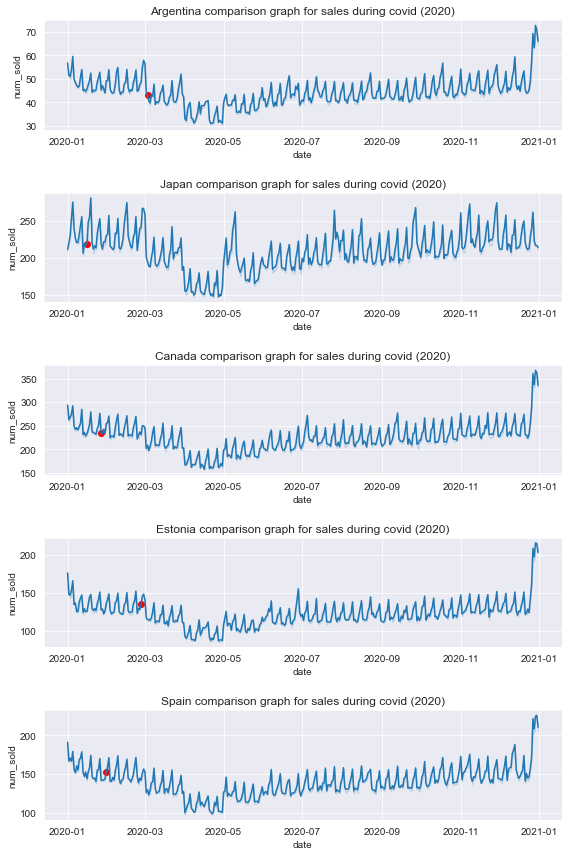

In [338]:
countries = list(set(cov_yearDf['country']))
covid_dates = [
    pd.Timestamp('2020-03-03'),
    pd.Timestamp('2020-01-16'),
    pd.Timestamp('2020-01-27'),
    pd.Timestamp('2020-02-27'),
    pd.Timestamp('2020-01-31')
    
]
fig, ax = plt.subplots(5,1, figsize=(8,12))
for i, comb in enumerate(zip(countries, covid_dates)):
    country_df = cov_yearDf.loc[cov_yearDf['country']==comb[0]]
    n_sold_cov = country_df.loc[country_df.date==comb[1],'num_sold'].mean()
    plot=sns.lineplot(data=country_df,x=country_df.date,y='num_sold',ci=False,ax=ax[i])
    plot.set_title(f'{comb[0]} comparison graph for sales during covid (2020)')
    ax[i].scatter(comb[1], n_sold_cov, color='r')
plt.tight_layout(h_pad=2.0)

Seems like there is no impact of first case date. All countries experienced drop in sales during April.

Ideas and codes for plots below are from [AMBROSM](https://www.kaggle.com/code/ambrosm/tpsjan22-01-eda-which-makes-sense) in Kaggle. 

In [292]:
train_data.set_index('date', inplace=True, drop=False)
cov_yearDf.set_index('date', inplace=True, drop=False)
ex_covid.set_index('date', inplace=True, drop=False)

In [287]:
def plot_line(country, df):
    country_df = df.loc[df['country']==country]
    plt.figure(figsize=(25, 12))
    for i, (comb, df) in enumerate(country_df.groupby(['store', 'product'])):
        ax = plt.subplot(3, 5, i+1, ymargin=0.5)
        ax.plot(df.num_sold)
        ax.set_title(comb)
    
    plt.tight_layout(h_pad=3.0)
    plt.suptitle(f'Daily sales for {country} in 2017-2021', y=1.02)
    plt.show()

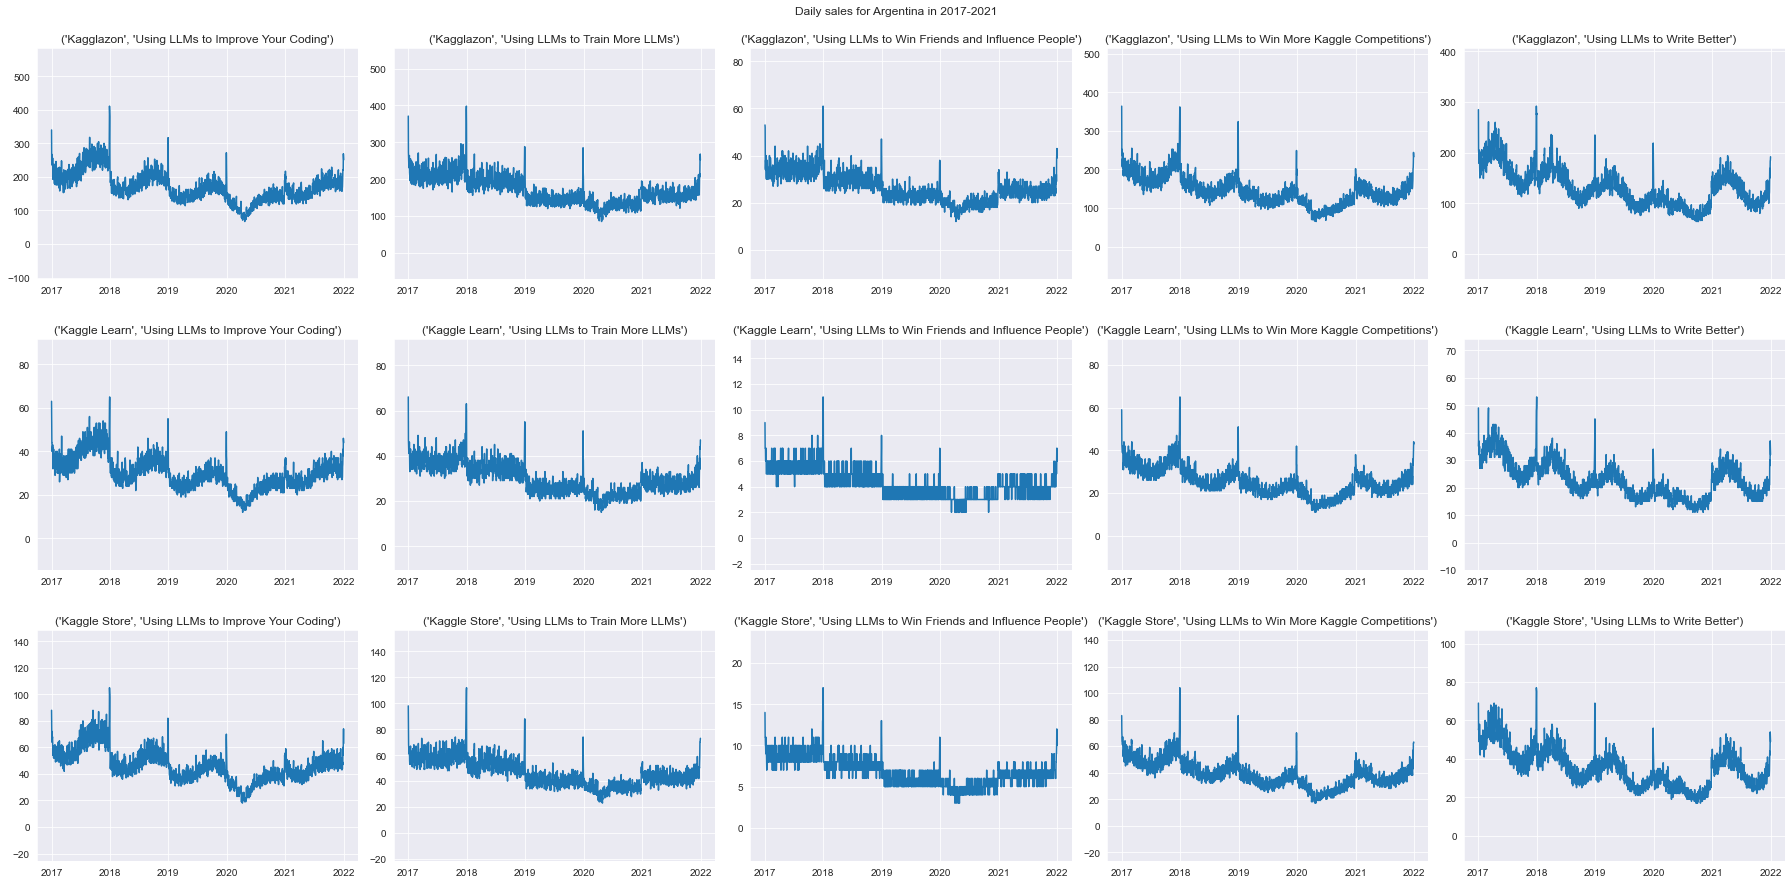

In [295]:
plot_line('Argentina', train_data)

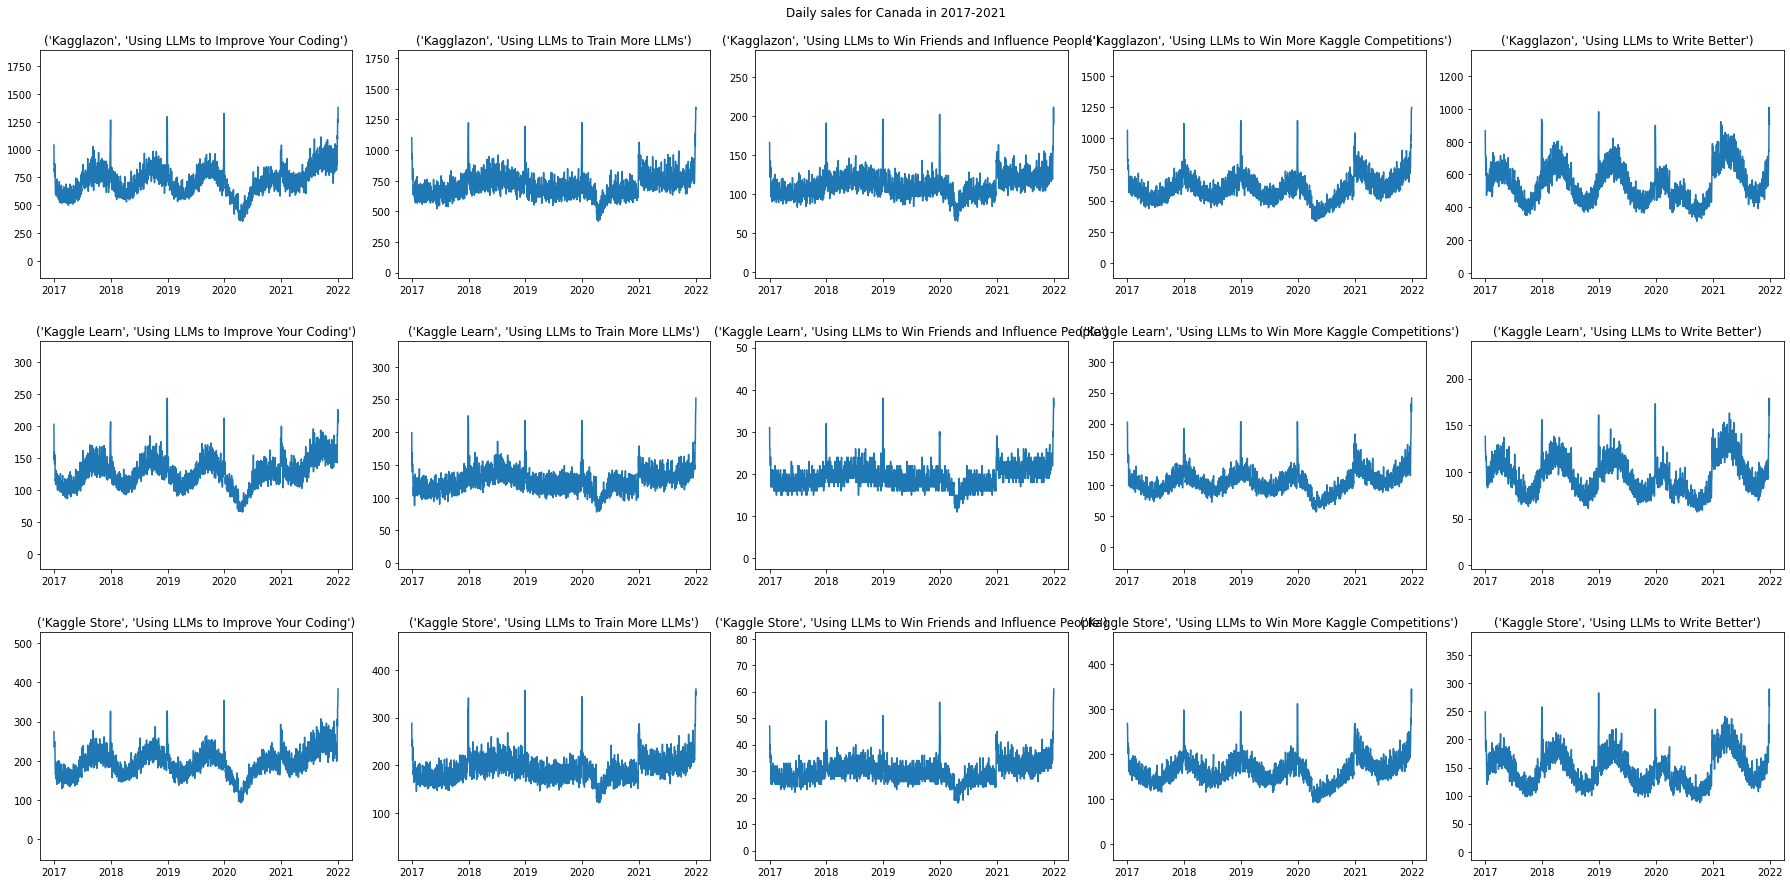

In [206]:
plot_line('Canada', train_data)

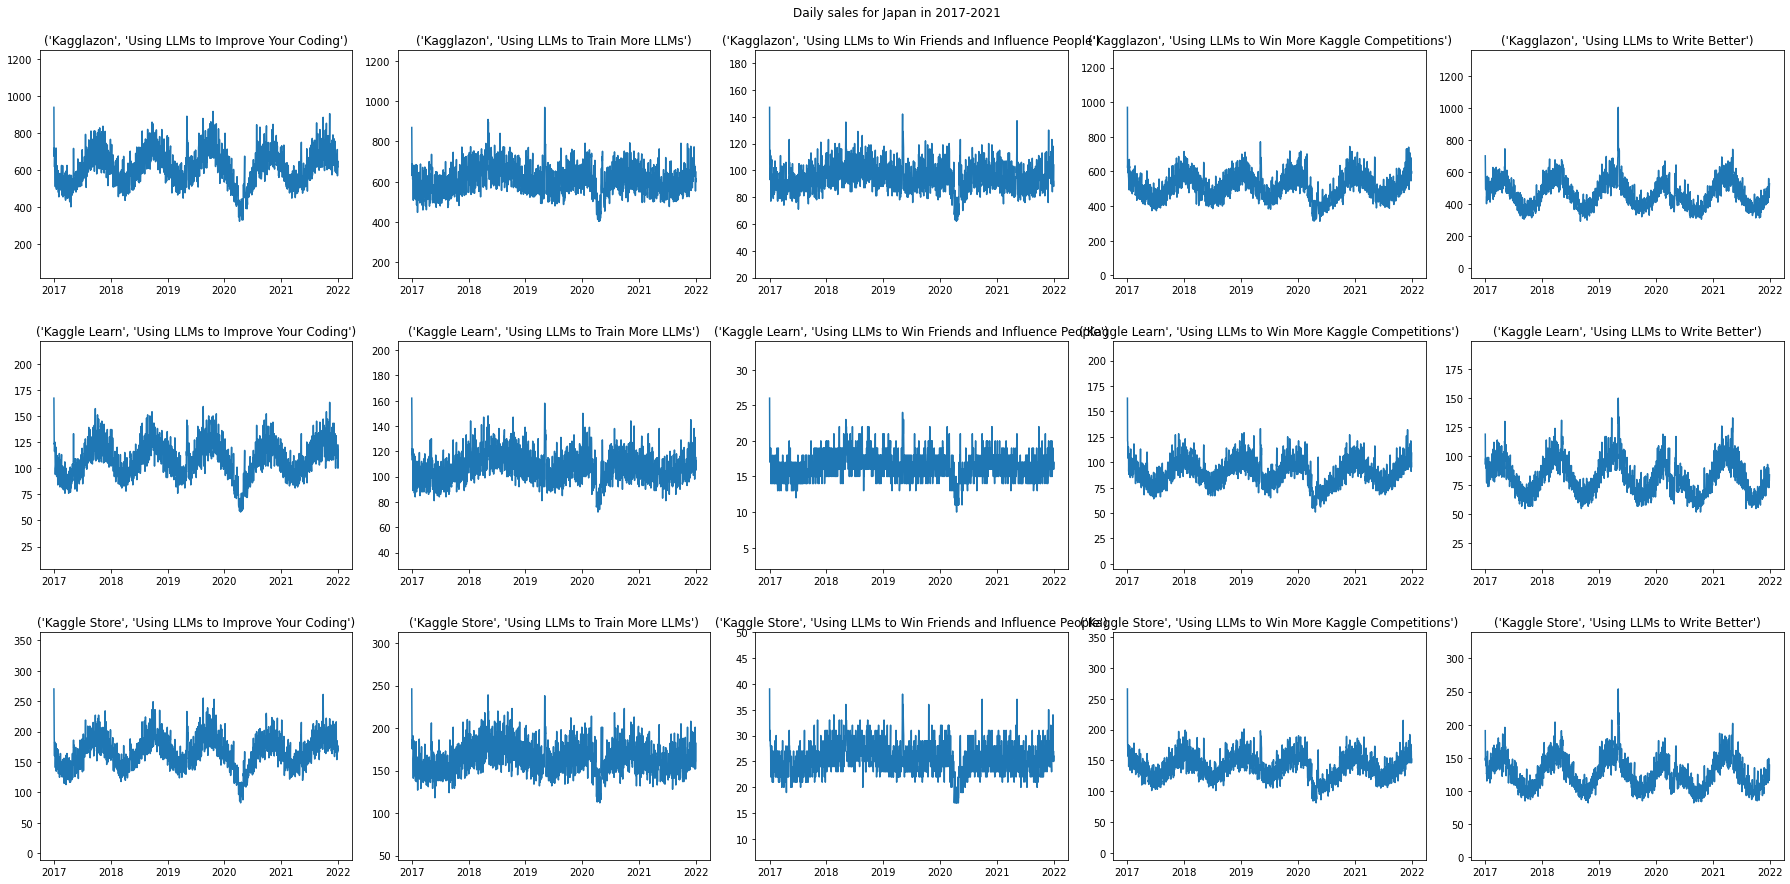

In [207]:
plot_line('Japan', train_data)

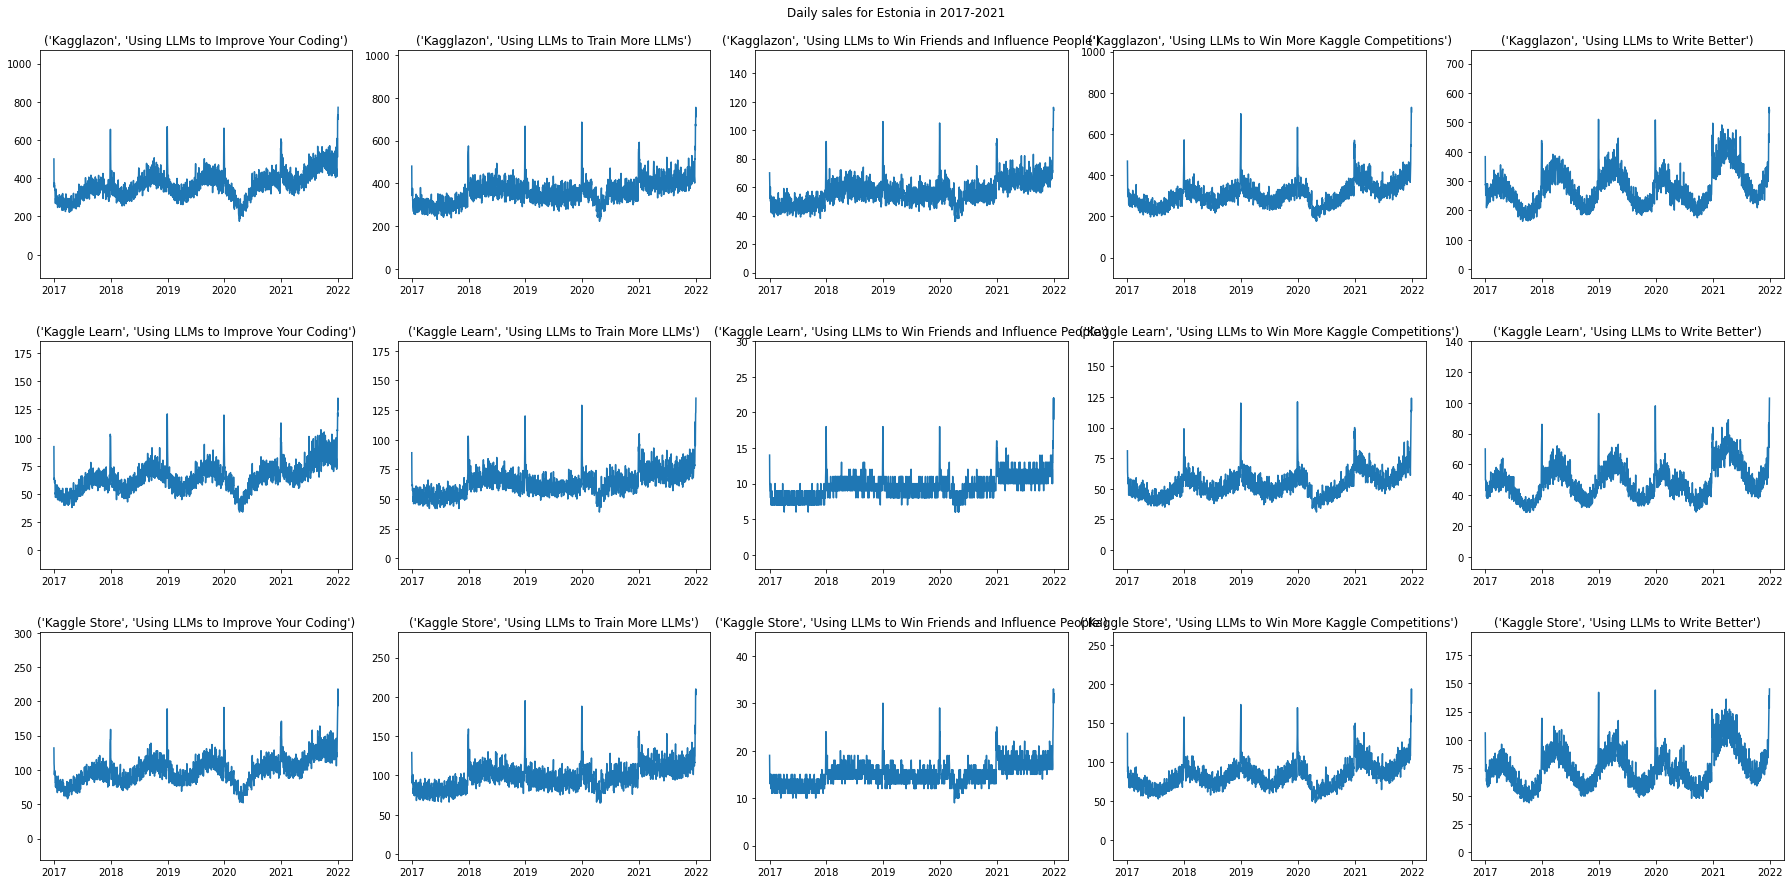

In [208]:
plot_line('Estonia', train_data)

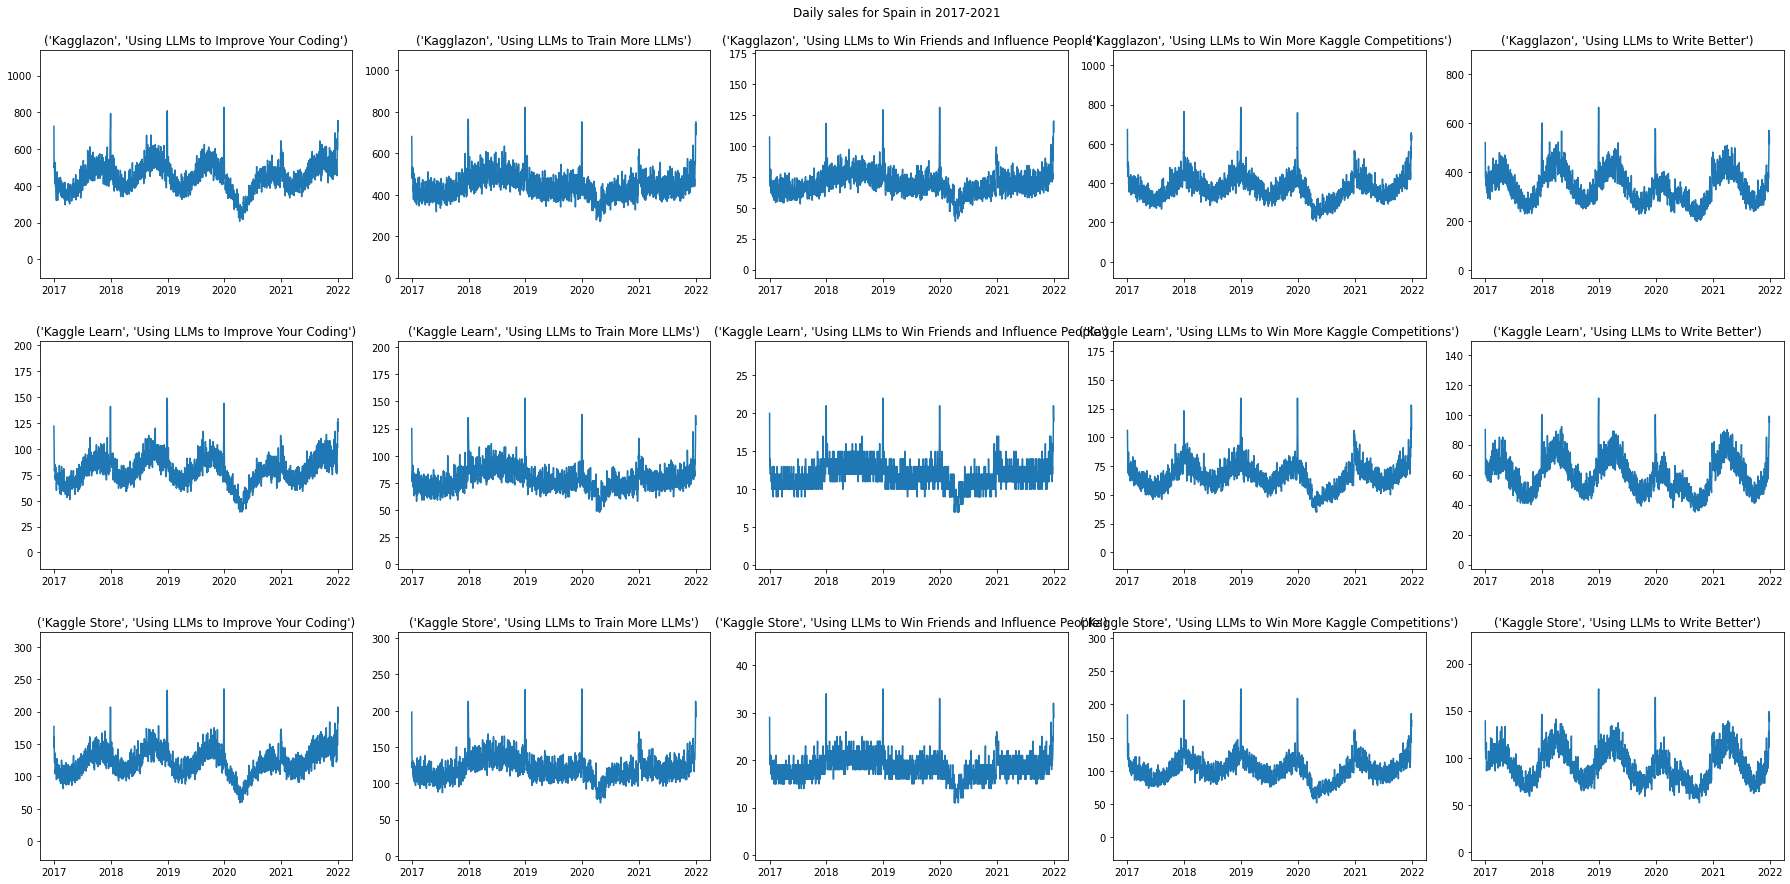

In [209]:
plot_line('Spain', train_data)

Overall, the yearly trend sales have same downward sales during the COVID pandemic outbreak and experience an increase afterwards. Moreover, every product sales peaked during the start/end of the year except in 2020/2021. 
Insights:
- ... your coding has an increasing trend from first half to second half of the year.
- ... train more LLMs does not have any trend.
- ... influence people has peaks during the year.
- ... kaggle competitions has downward sales during middle year.
- ... write better has better sales in the first half.

In [238]:
def plot_bar(country, df):
    country_df = df.loc[df['country']==country]
    plt.figure(figsize=(18, 12))
    for i, (combi, df) in enumerate(country_df.groupby(['product', 'store'])):
        ax = plt.subplot(5, 3, i+1, ymargin=0.5)
        ax.bar(range(1, 32),
               df.num_sold[df.date.dt.month==12].groupby(df.date.dt.day).mean(),
               color=['b'] * 24 + ['orange'] * 7)
        ax.set_title(combi)
        ax.set_xticks(ticks=range(5, 31, 5))
    plt.tight_layout(h_pad=3.0)
    plt.suptitle(f'Daily sales for {country} in December', y=1.02)
    plt.show()

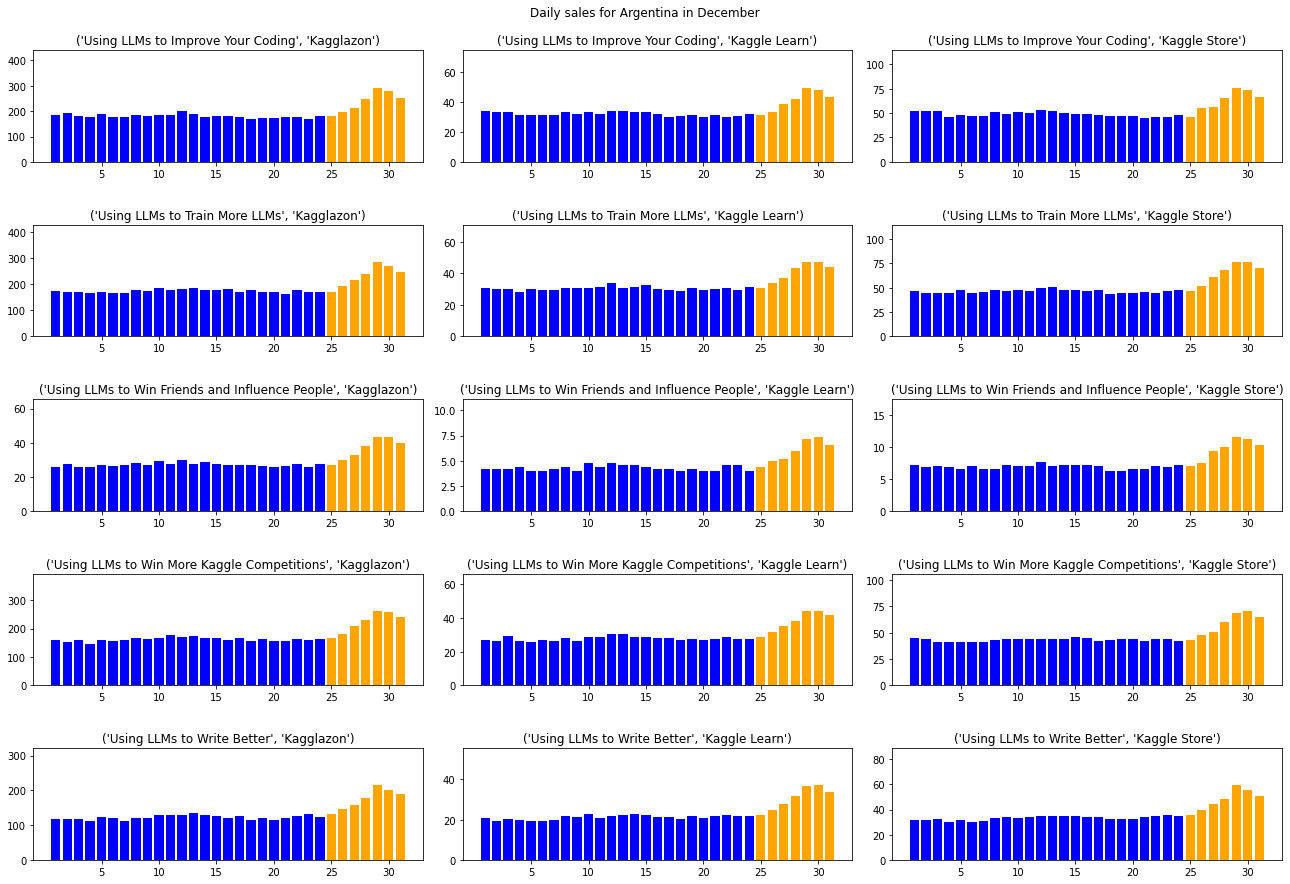

In [239]:
plot_bar('Argentina', train_data)

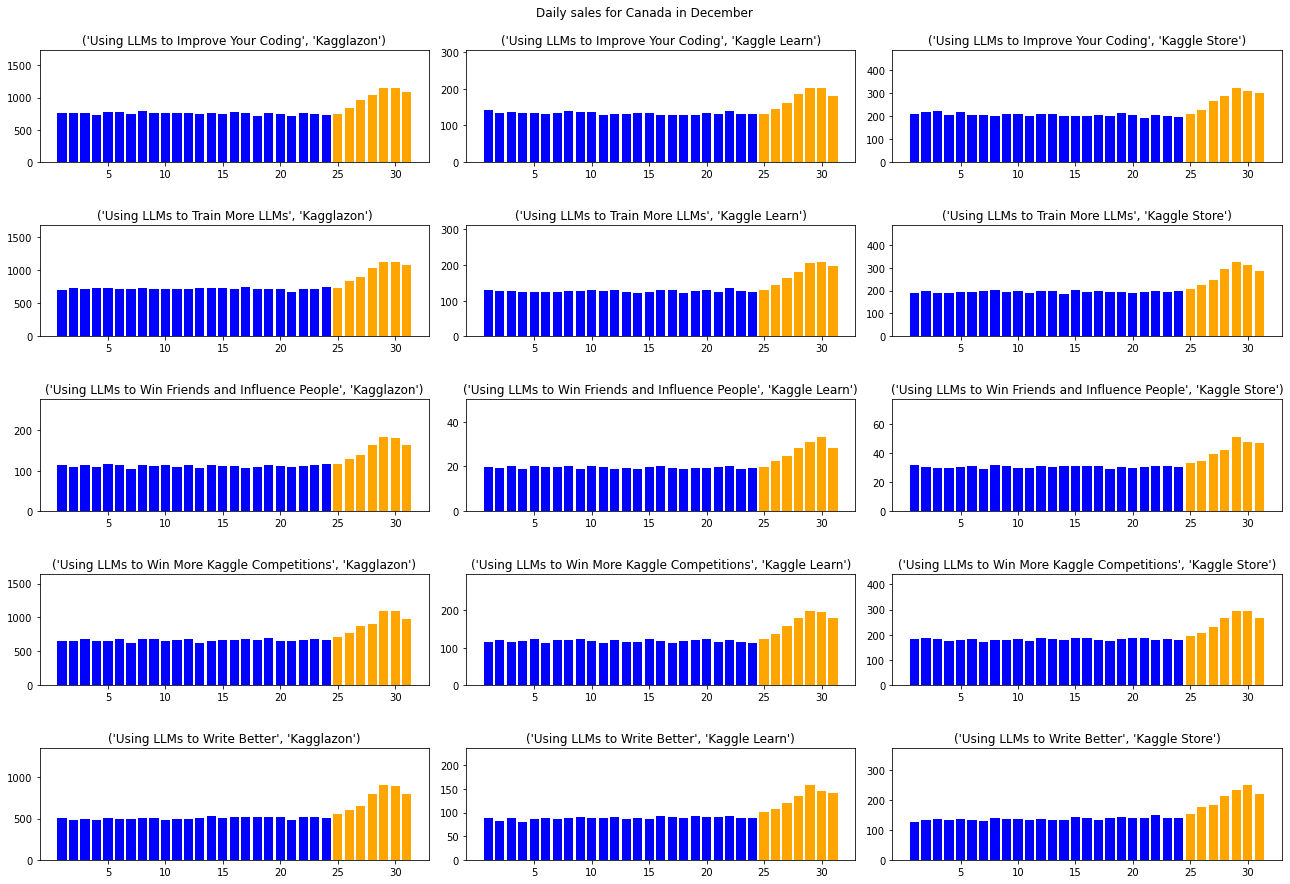

In [240]:
plot_bar('Canada', train_data)

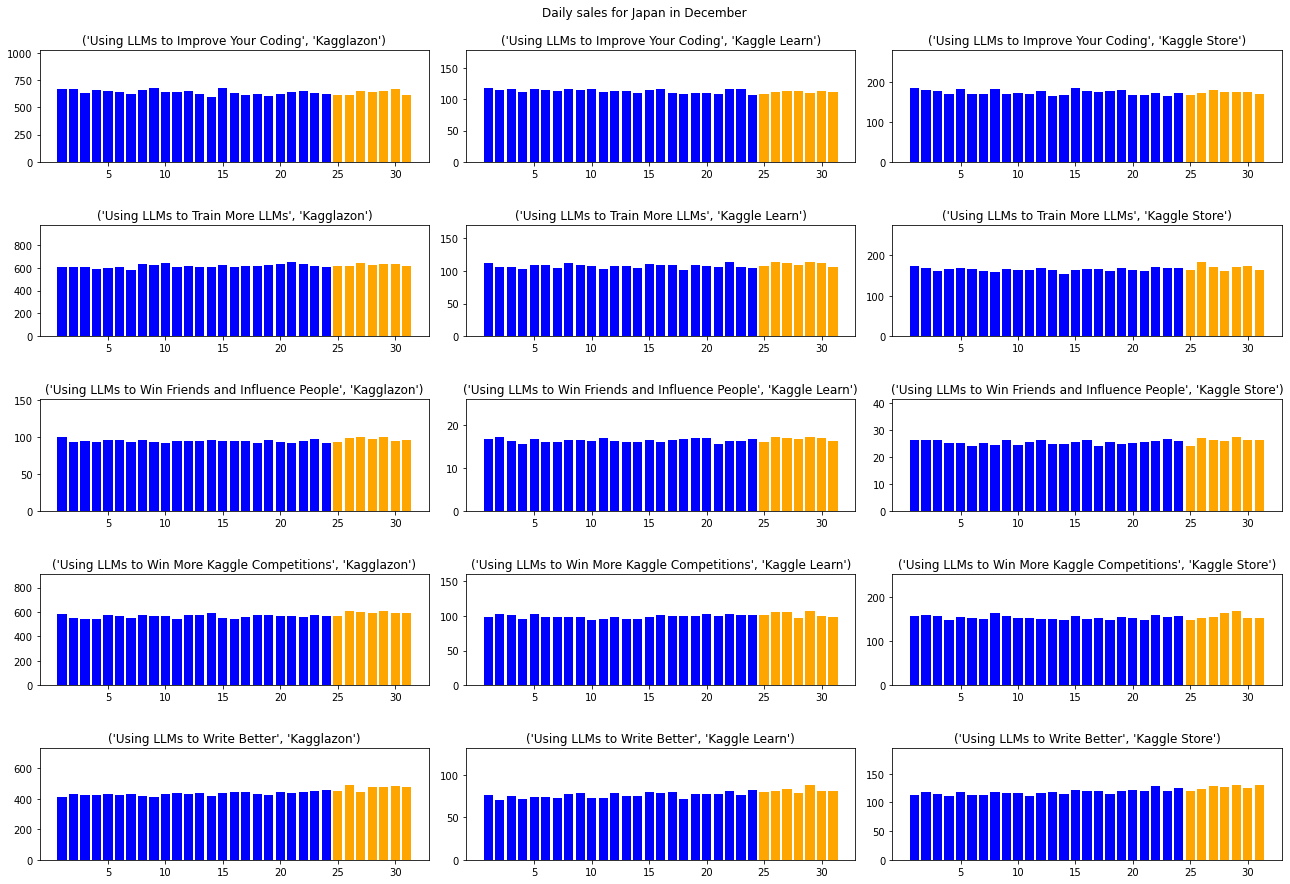

In [241]:
plot_bar('Japan', train_data)

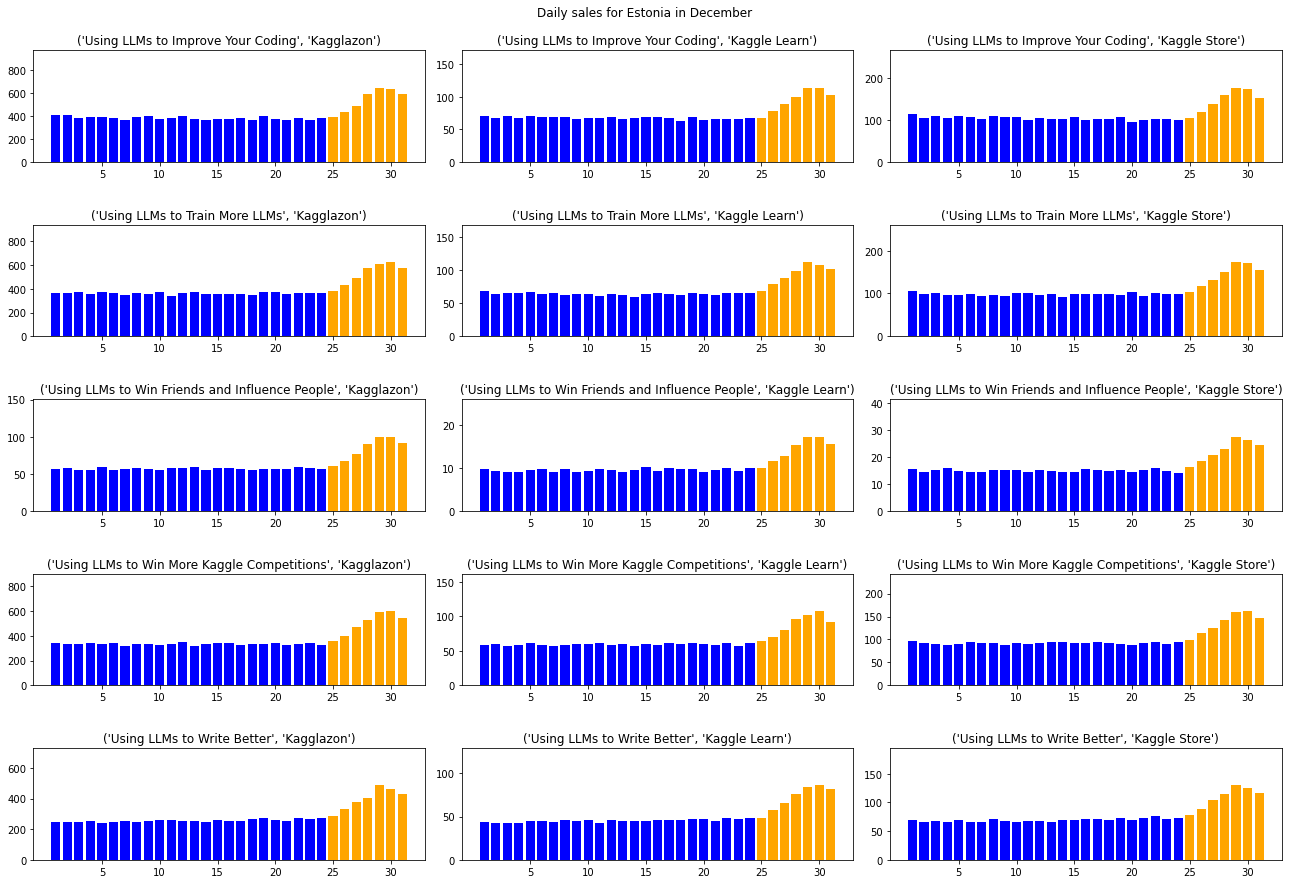

In [242]:
plot_bar('Estonia', train_data)

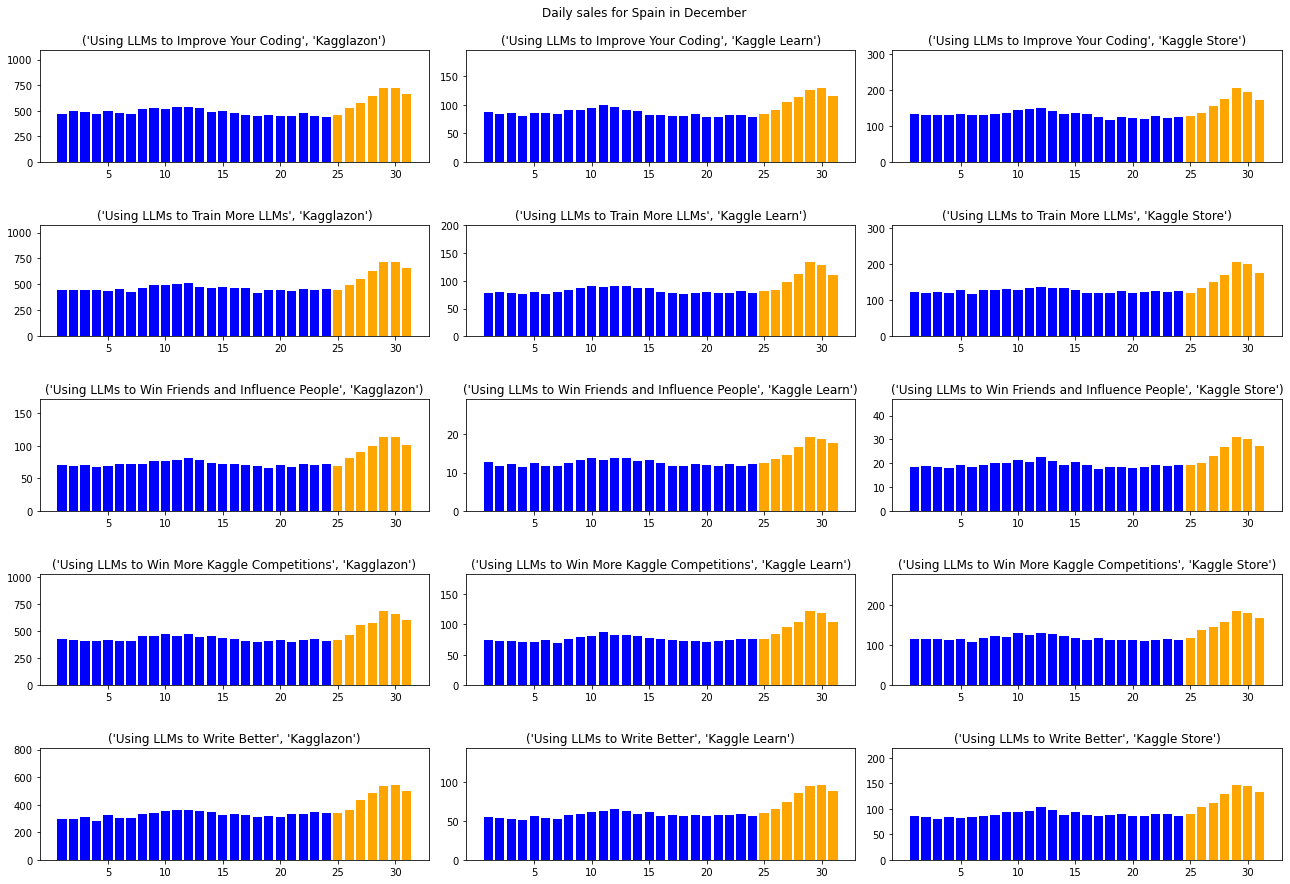

In [243]:
plot_bar('Spain', train_data)

An interesting insight is every sales in each country peaks during christmas to new year except Japan.

In [252]:
def plot_monthYear(country, df):
    country_df = df.loc[df['country']==country]
    plt.figure(figsize=(18, 12))
    for i, (combi, df) in enumerate(country_df.groupby(['product', 'store'])):
        ax = plt.subplot(5, 3, i+1, ymargin=0.5)
        resampled = df.resample('MS').num_sold.sum()
        ax.bar(range(len(resampled)), resampled)
        ax.set_title(combi)
        ax.set_ylim(resampled.min(), resampled.max())
        ax.set_xticks(range(0, 60, 12), [f"Jan {y}" for y in range(2017, 2022)])
    plt.suptitle(f'Monthly sales for {country} during 2017-2021', y=1.03)
    plt.tight_layout(h_pad=3.0)
    plt.show()

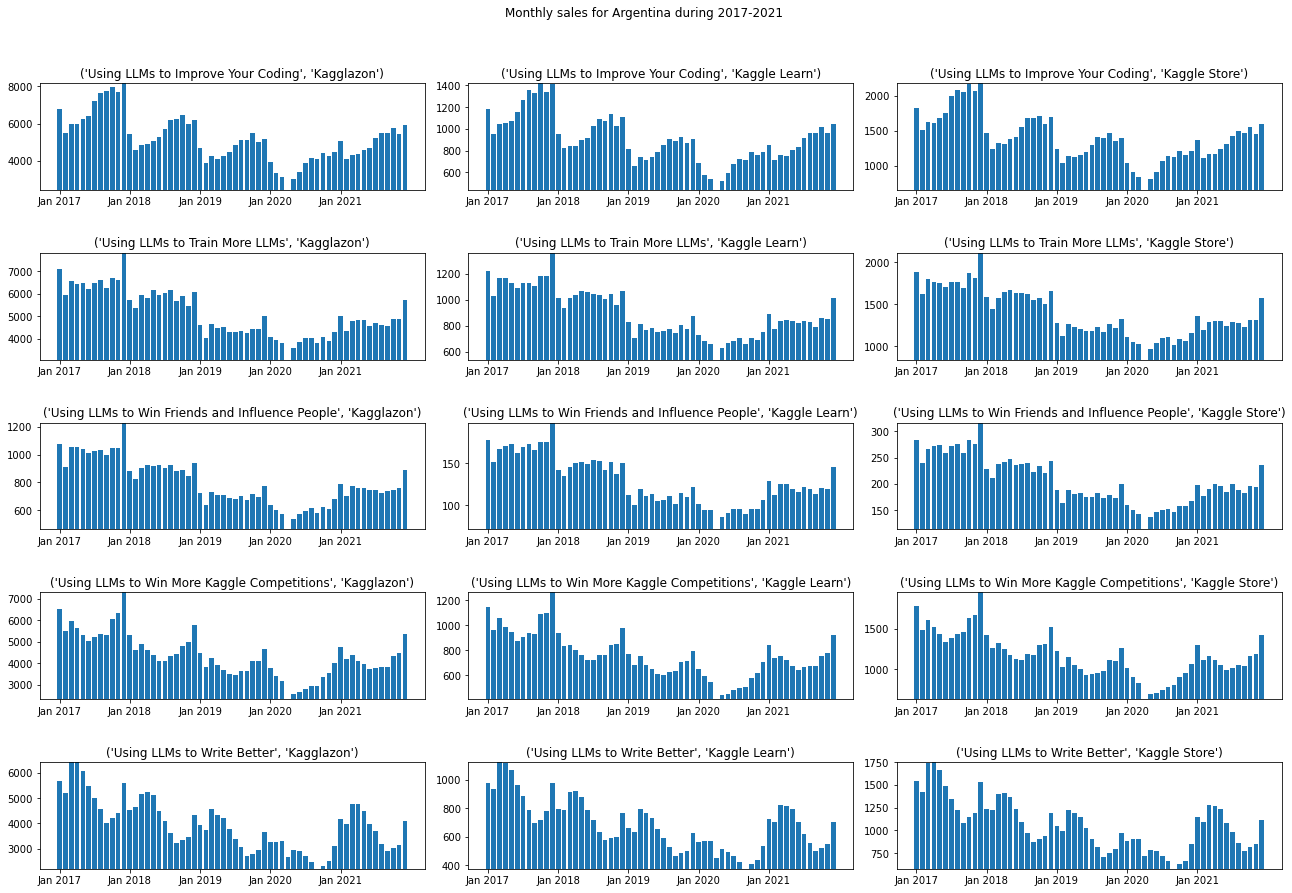

In [253]:
plot_monthYear('Argentina', train_data)

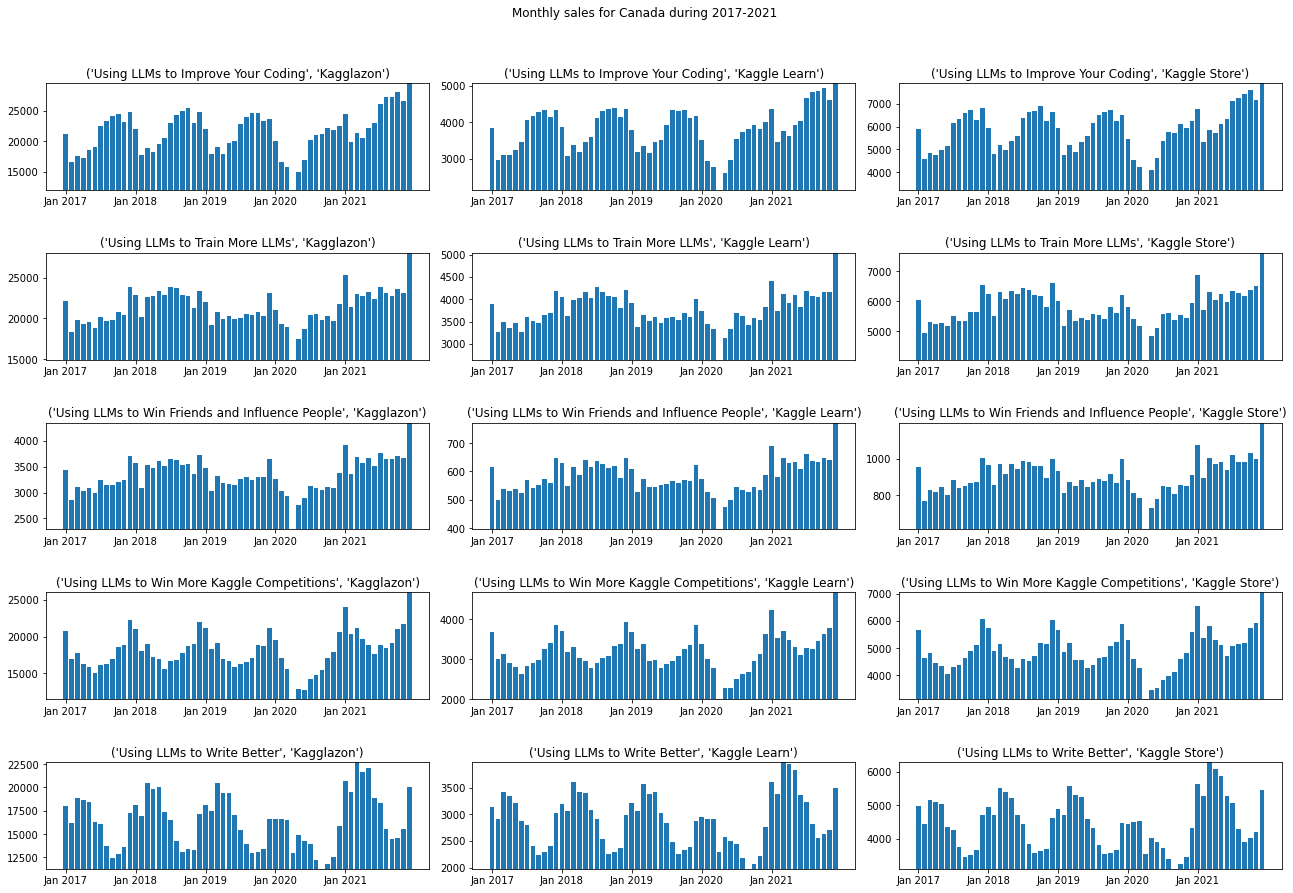

In [246]:
plot_monthYear('Canada', train_data)

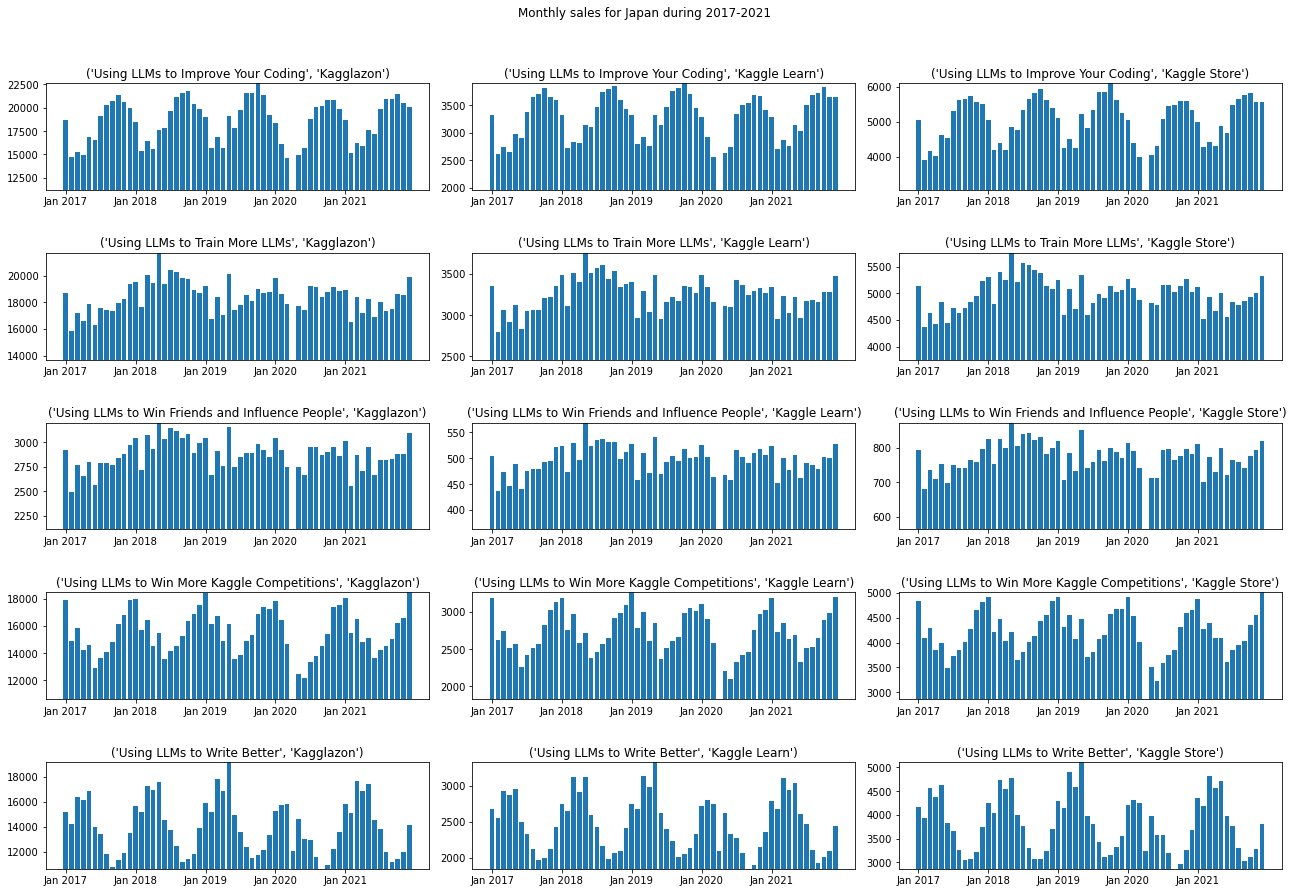

In [247]:
plot_monthYear('Japan', train_data)

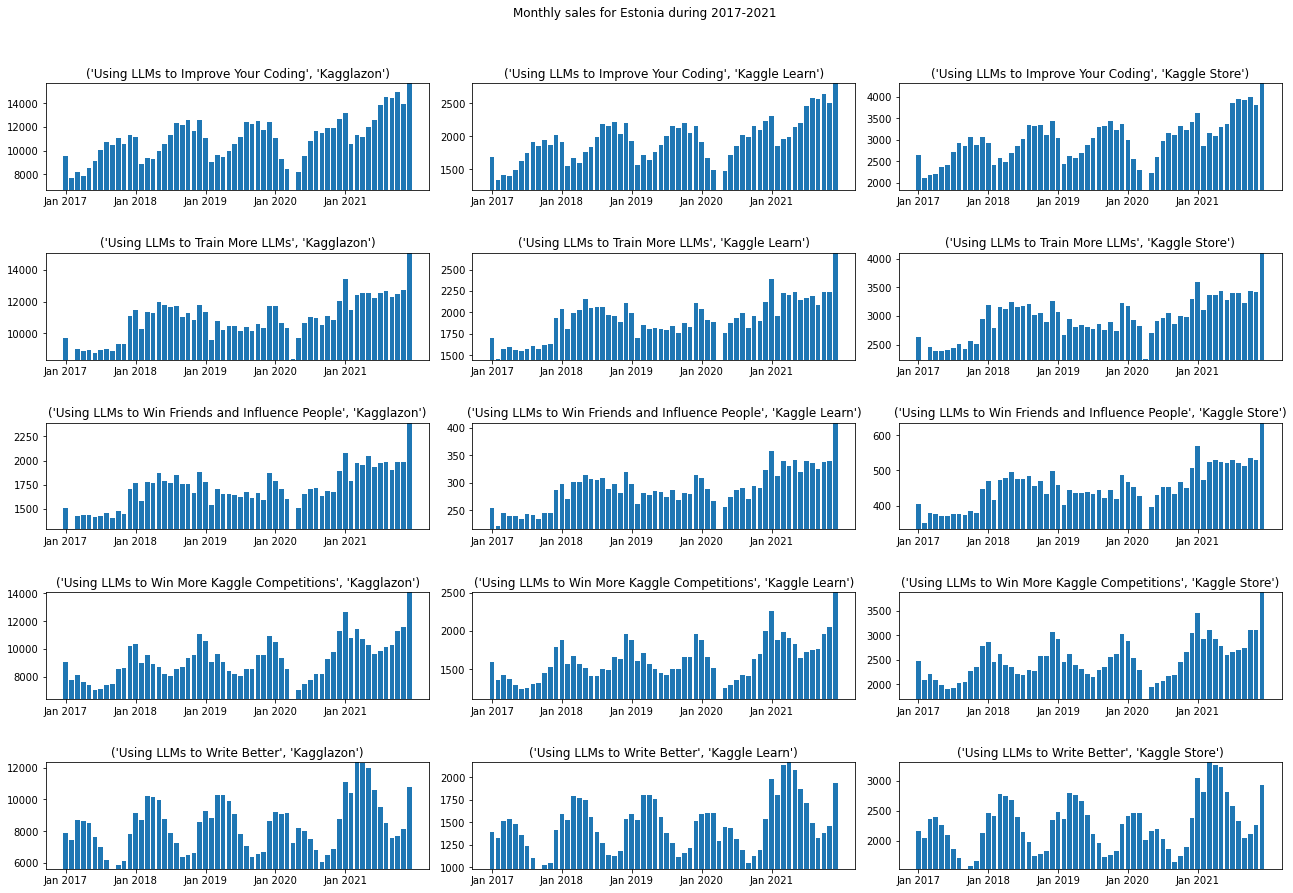

In [248]:
plot_monthYear('Estonia', train_data)

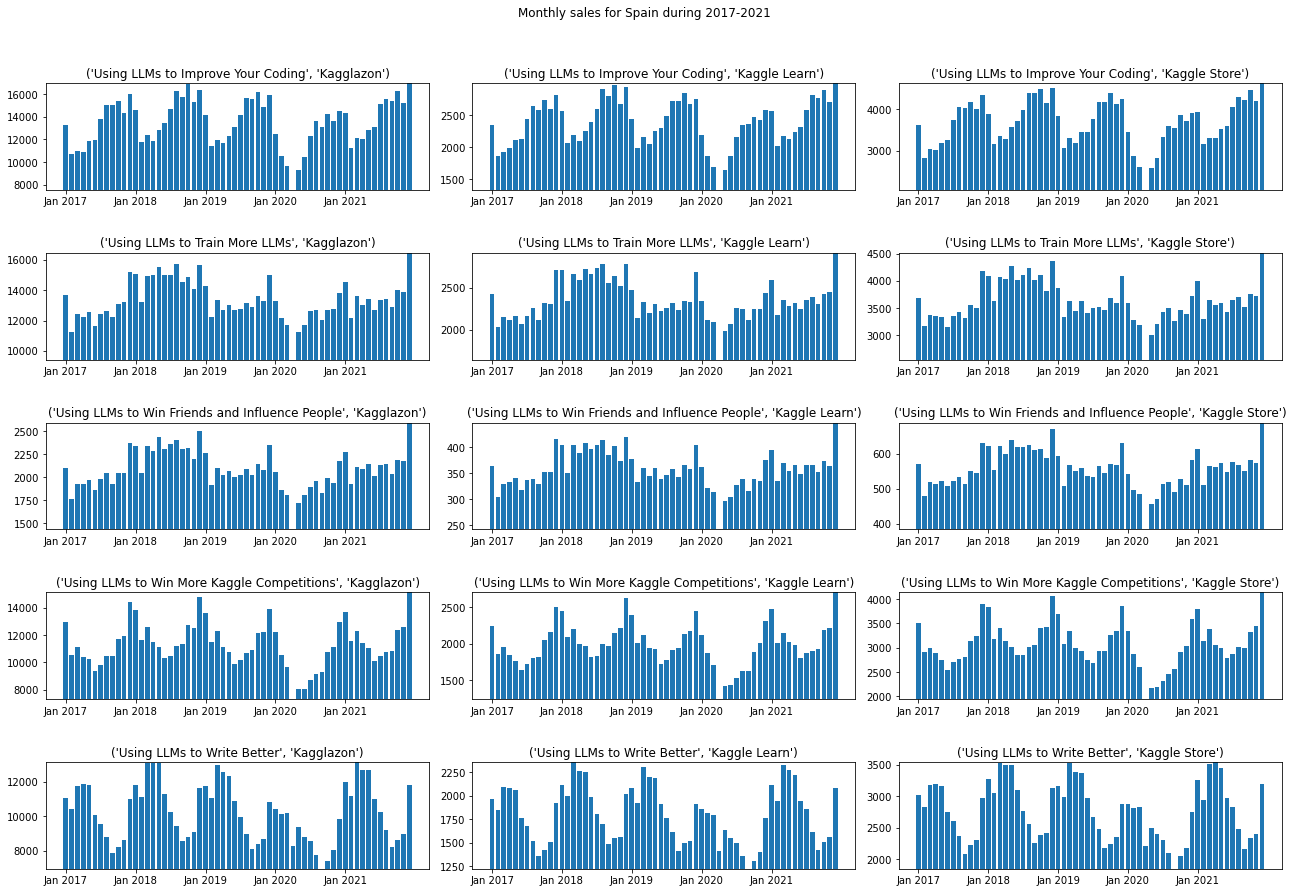

In [249]:
plot_monthYear('Spain', train_data)

In [296]:
def plot_monthly(country, df):
    country_df = df.loc[df['country']==country]
    plt.figure(figsize=(18, 12))
    for i, (combi, df) in enumerate(country_df.groupby(['product', 'store'])):
        ax = plt.subplot(5, 3, i+1, ymargin=0.5)
        resampled = df.resample('MS').sum()
        resampled = resampled.groupby(resampled.index.month).mean()
        ax.bar(range(1, 13), resampled.num_sold)
        ax.set_xticks(ticks=range(1, 13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
        ax.set_title(combi)
        ax.set_ylim(resampled.num_sold.min(), resampled.num_sold.max())
    plt.suptitle(f'Monthly sales for {country} during 2017-2021 except 2020', y=1.02)
    plt.tight_layout(h_pad=3.0)
    plt.show()

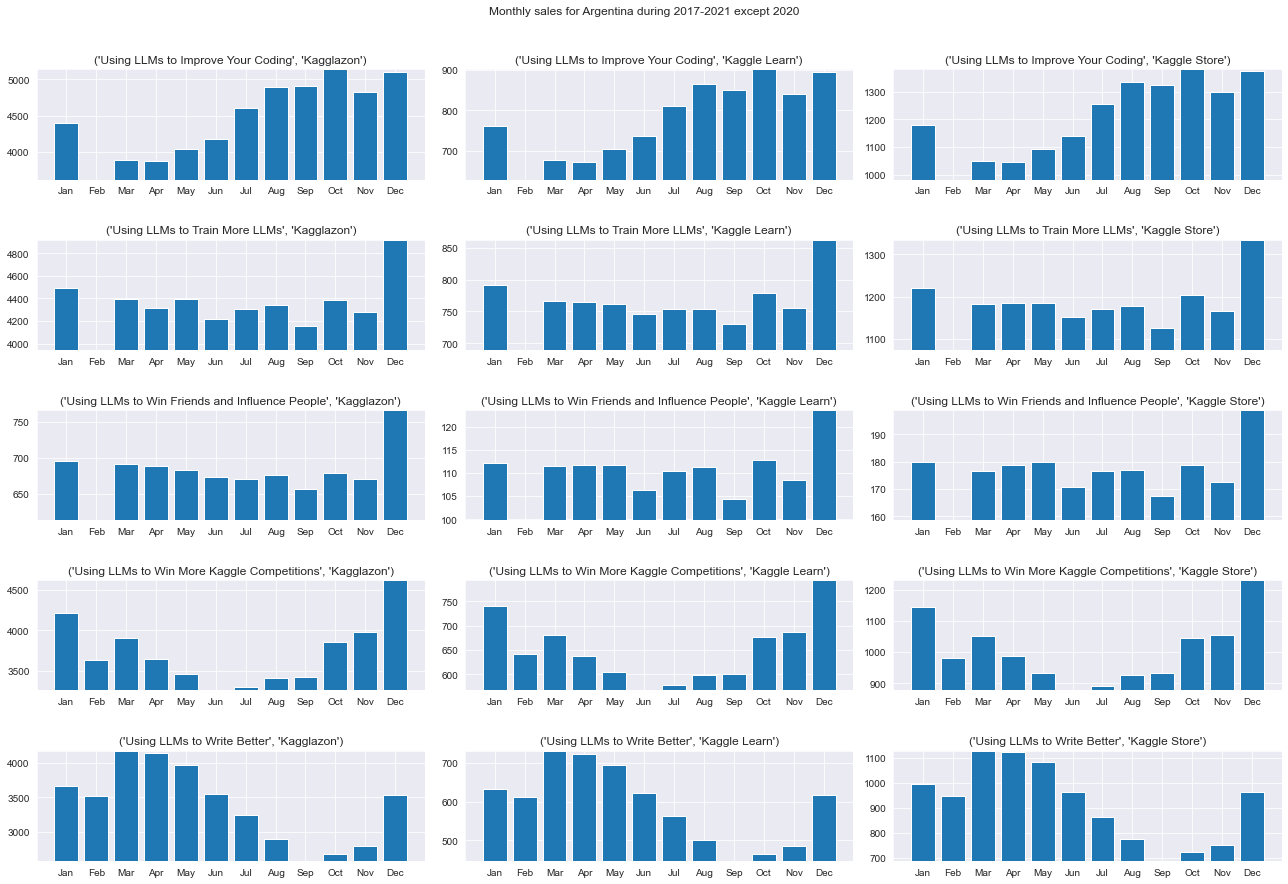

In [297]:
plot_monthly('Argentina', ex_covid)

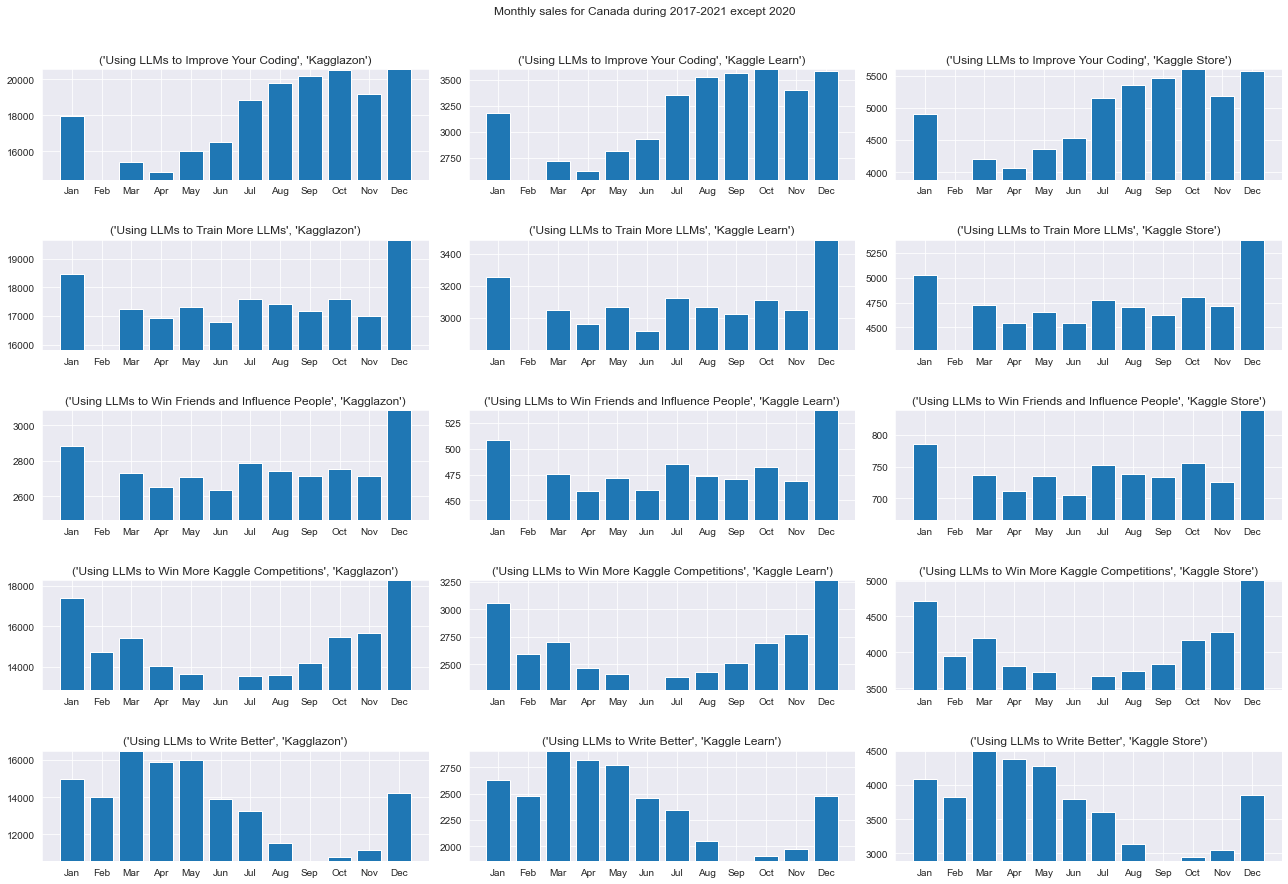

In [298]:
plot_monthly('Canada', ex_covid)

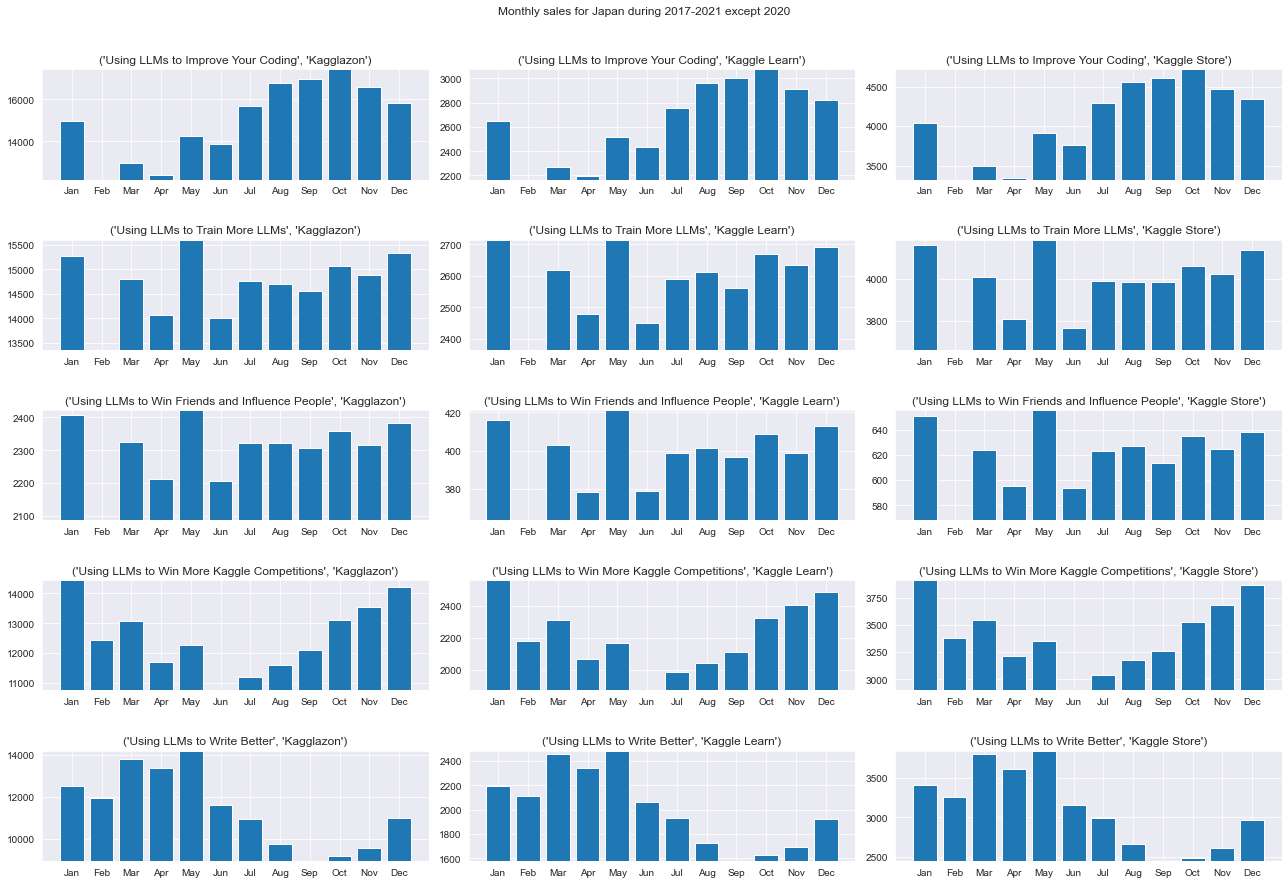

In [299]:
plot_monthly('Japan', ex_covid)

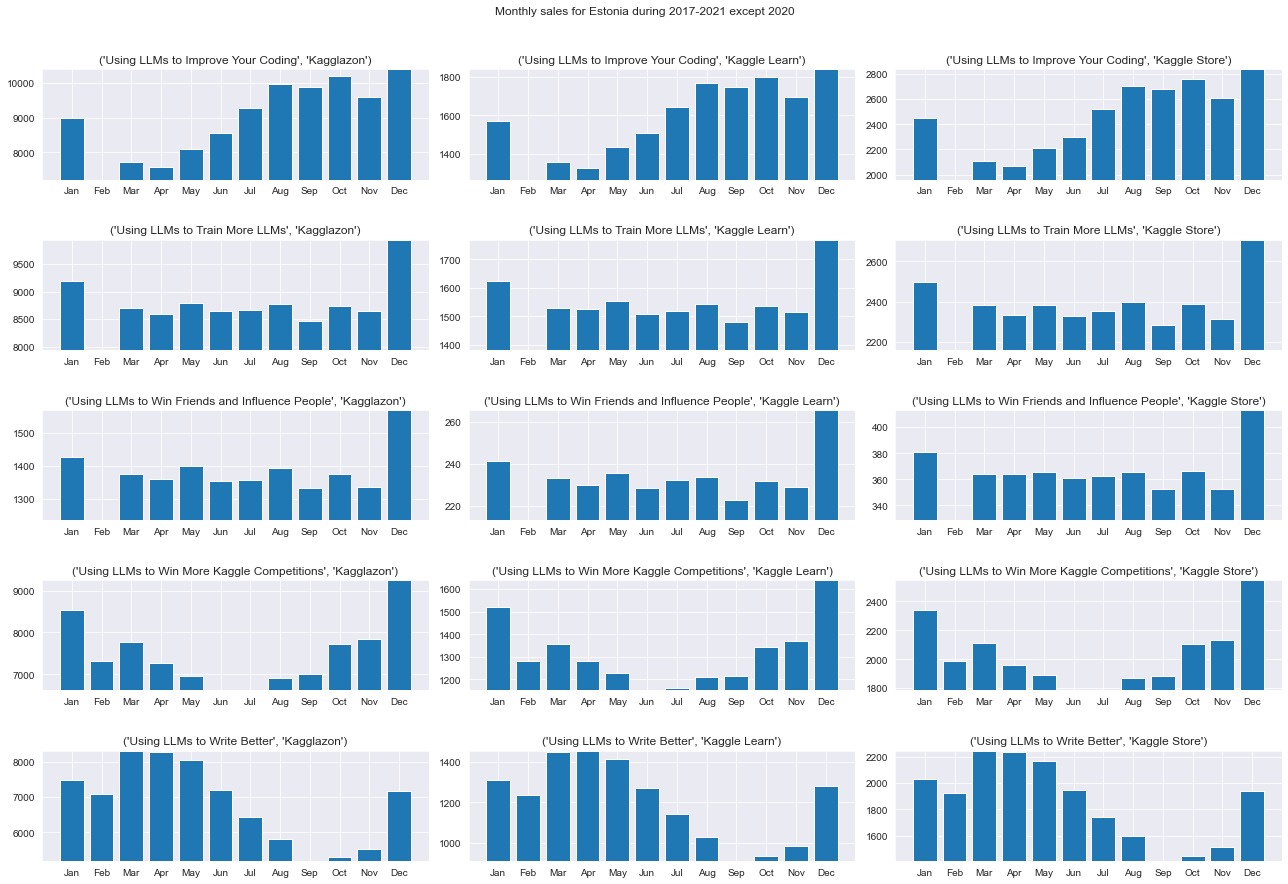

In [300]:
plot_monthly('Estonia', ex_covid)

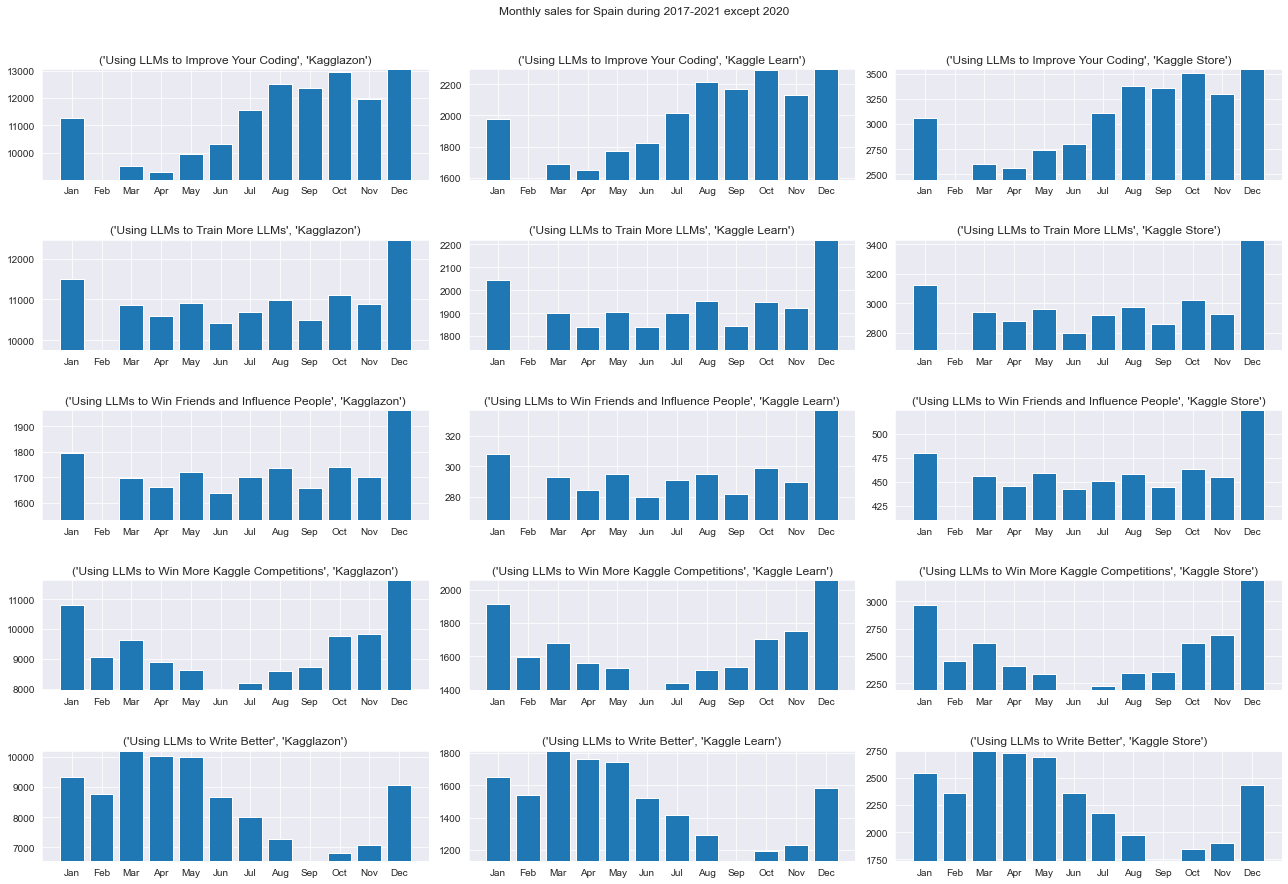

In [301]:
plot_monthly('Spain', ex_covid)

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

Insights drawn:
- IYC sales always **increases** during the **second half of the year (Q3-Q4)**.
- TTL has a slight trend of **peaking** in start and end of the year **(Jan and Dec)**.
- WFIP has similar trend/pattern with TTL in each country.
- WMKC always **peaks** during start and end of year **(Jan and Dec)**.
- WB sales always **increases** during the first half of the year **(Q1-Q2)**.

Additional:
- IYC, TTL, WFIP has **lowest** sales in **February** for all countries and stores.
- WMKC has **lowest** sales in **June** and both **June and July in Estonia**.
- WB has **lowest** sales in **September** for all countries and stores.
- TTL always has the **highest** sales in **December** except for **Japan which has highest also in May**.
- WB has **highest** sales always on **March-May**.

In [304]:
def plot_growth(country, df):
    country_df = df.loc[df['country']==country]
    plt.figure(figsize=(18, 12))
    for i, (combi, df) in enumerate(country_df.groupby(['product', 'store'])):
        ax = plt.subplot(5, 3, i+1, ymargin=0.5)
        resampled = df.resample('AS').sum()
        ax.fill_between(range(2017, 2022), resampled.num_sold, color='brown')
        ax.set_title(combi)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_ylim(0, resampled.num_sold.max())
    plt.suptitle(f'Sales growth for {country} during 2017-2021', y=1.02)
    plt.tight_layout(h_pad=3.0)
    plt.show()

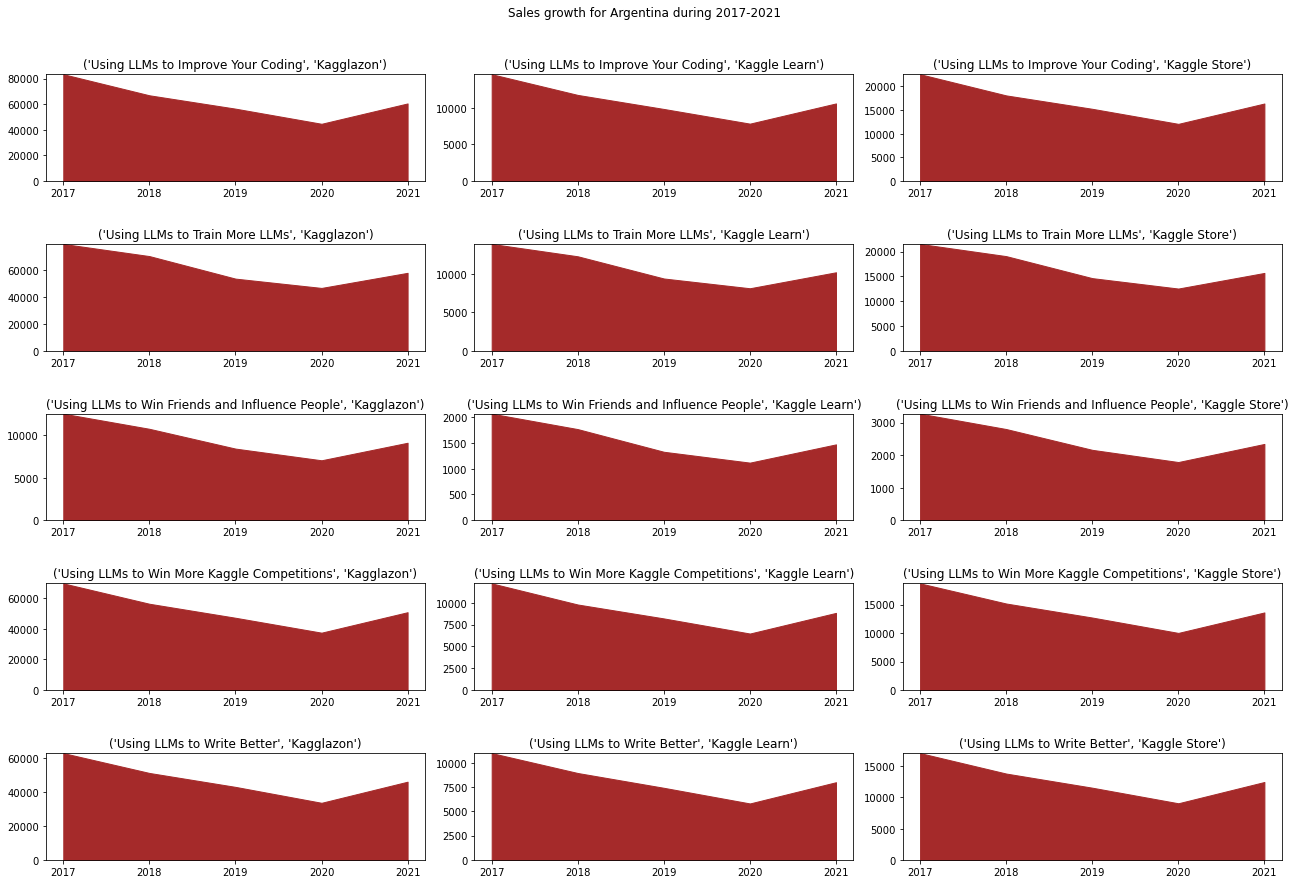

In [305]:
plot_growth('Argentina', train_data)

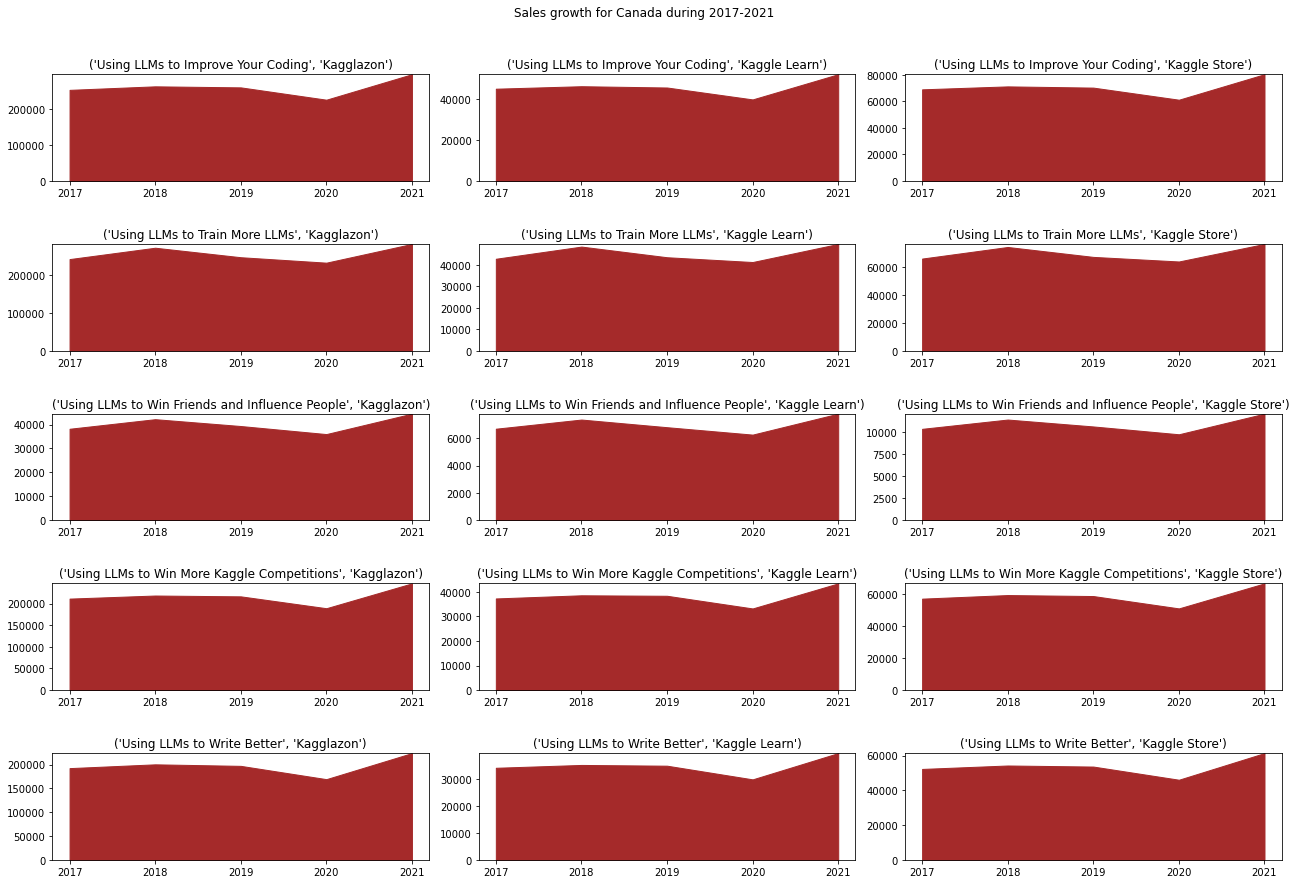

In [274]:
plot_growth('Canada', train_data)

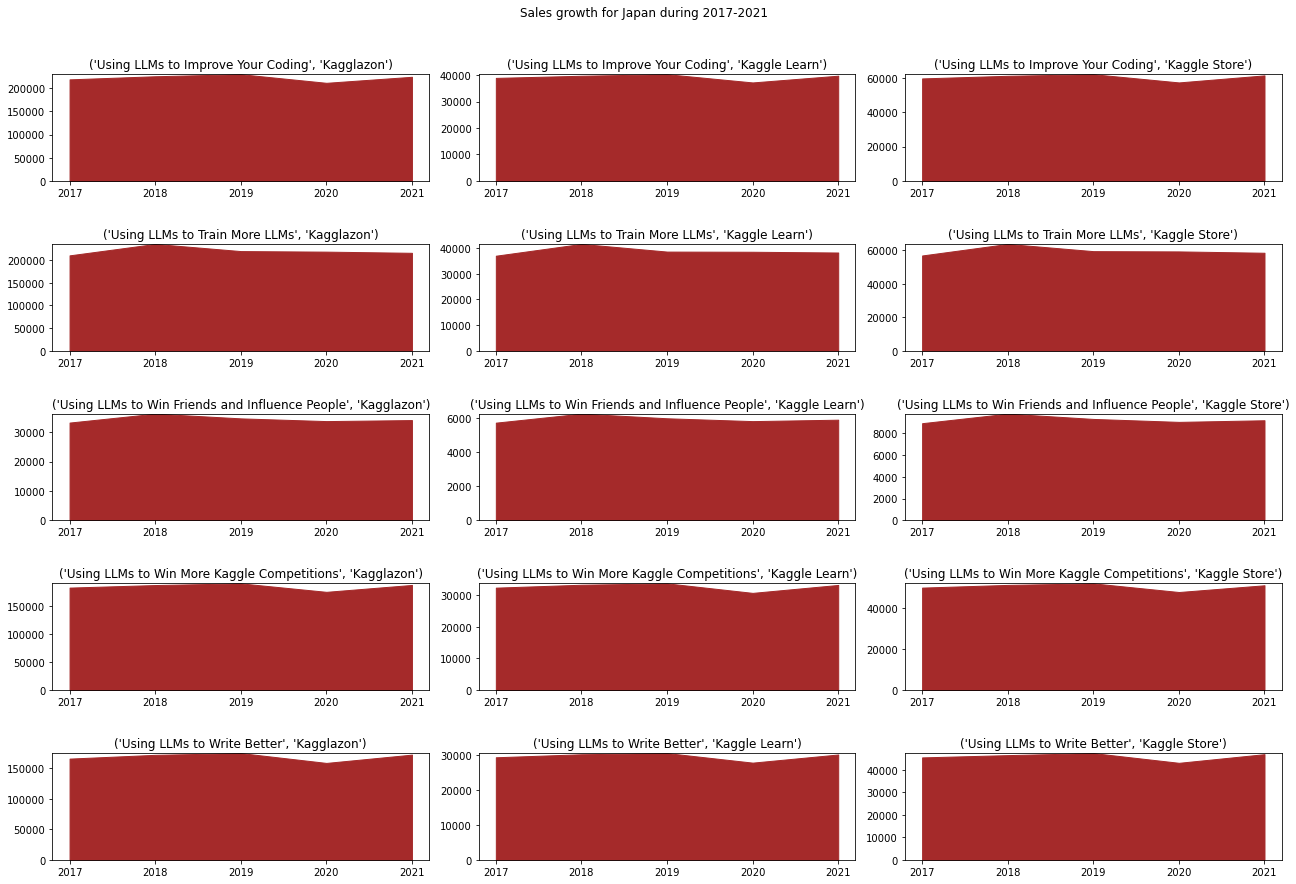

In [275]:
plot_growth('Japan', train_data)

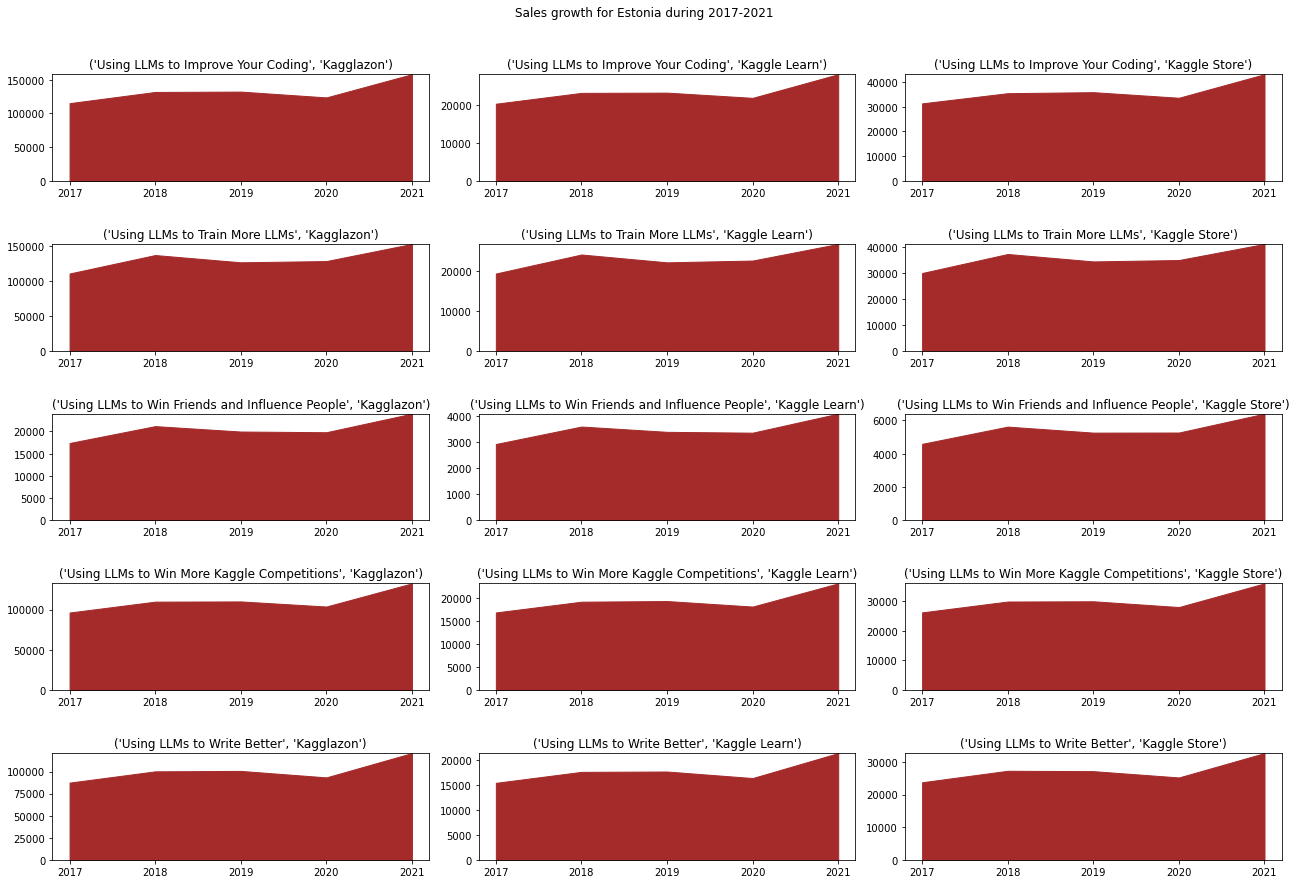

In [276]:
plot_growth('Estonia', train_data)

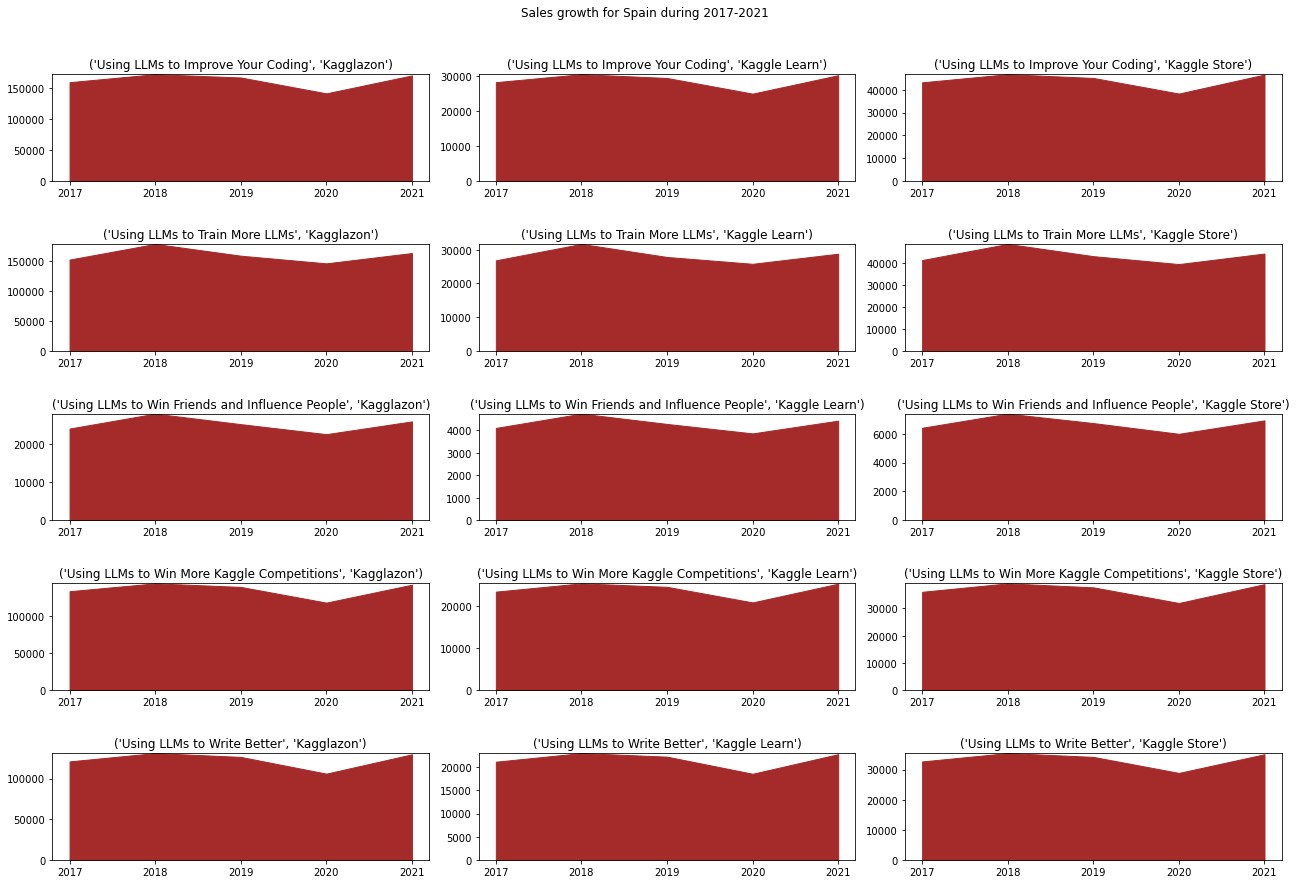

In [277]:
plot_growth('Spain', train_data)

Insights:
- Argentina has a downward trend until 2020.
- Canada has an increasing trend in 2021.
- Japan has peak sales in 2018-2019.
- Estonia overall has an increasing trend except in 2020.
- Spain has peak sales in 2018.

In [372]:
def plot_weekday(country, df):
    country_df = train_data.loc[train_data['country']==country]
    plt.figure(figsize=(18, 12))
    for i, (combi, df) in enumerate(country_df.groupby(['product', 'store'])):
        ax = plt.subplot(5, 3, i+1, ymargin=0.5)
        resampled = df.groupby(df.index.dayofweek).mean()
        ax.bar(range(7), resampled.num_sold, 
               color=['b']*4 + ['g'] + ['orange']*2)
        ax.set_title(combi)
        ax.set_xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        ax.set_ylim(0, resampled.num_sold.max())
    plt.suptitle('Sales per day of the week', y=1.03)
    plt.tight_layout(h_pad=3.0)
    plt.show()

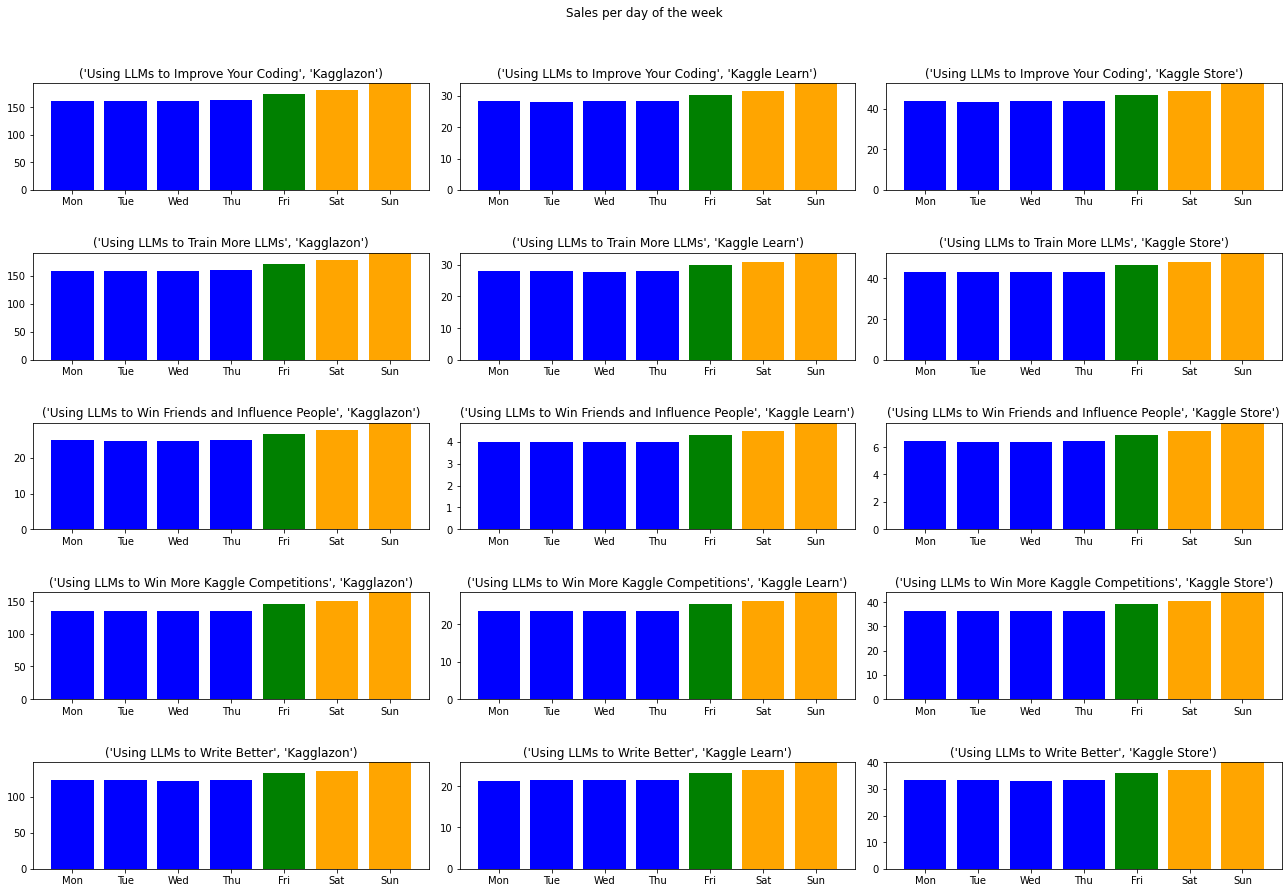

In [373]:
plot_weekday('Argentina', train_data)

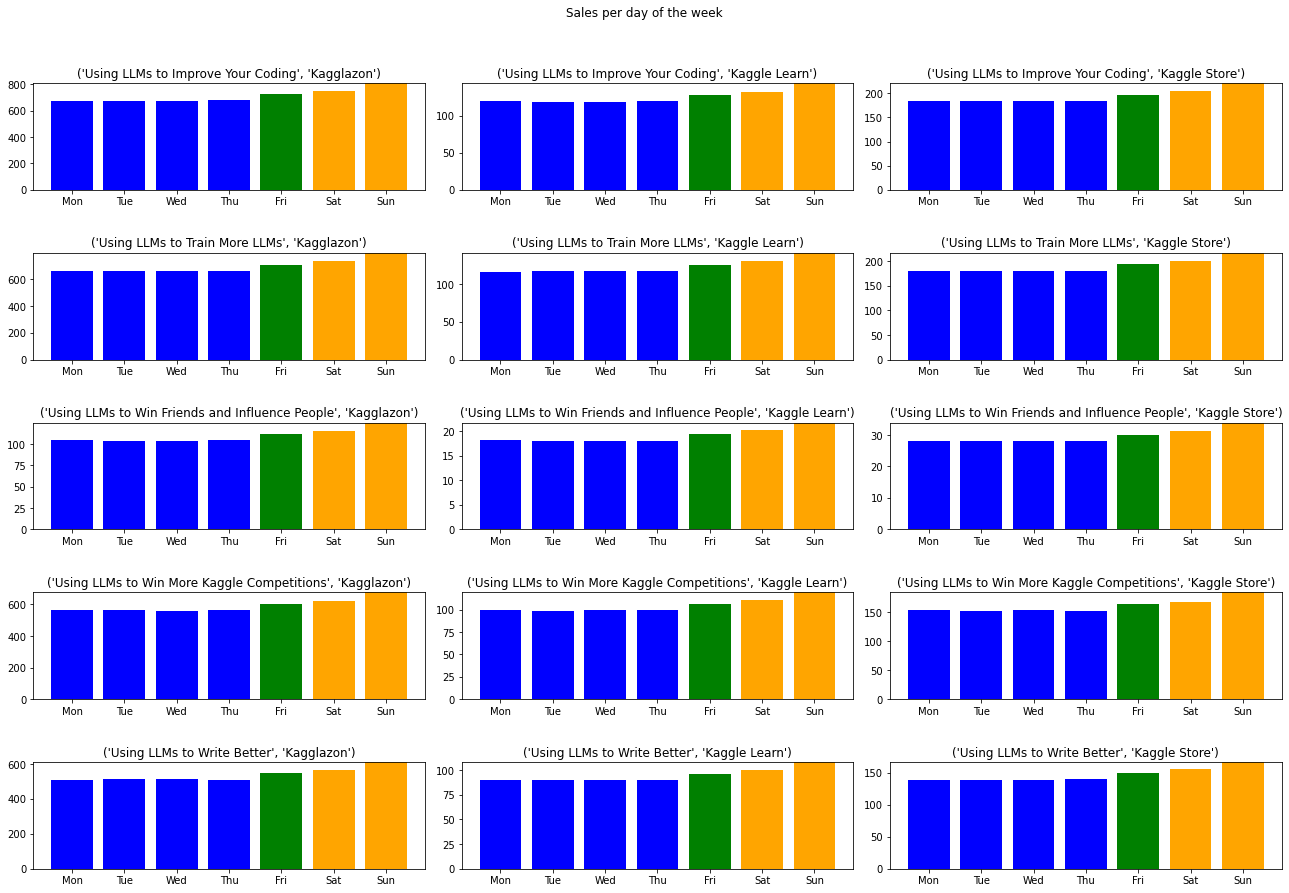

In [374]:
plot_weekday('Canada', train_data)

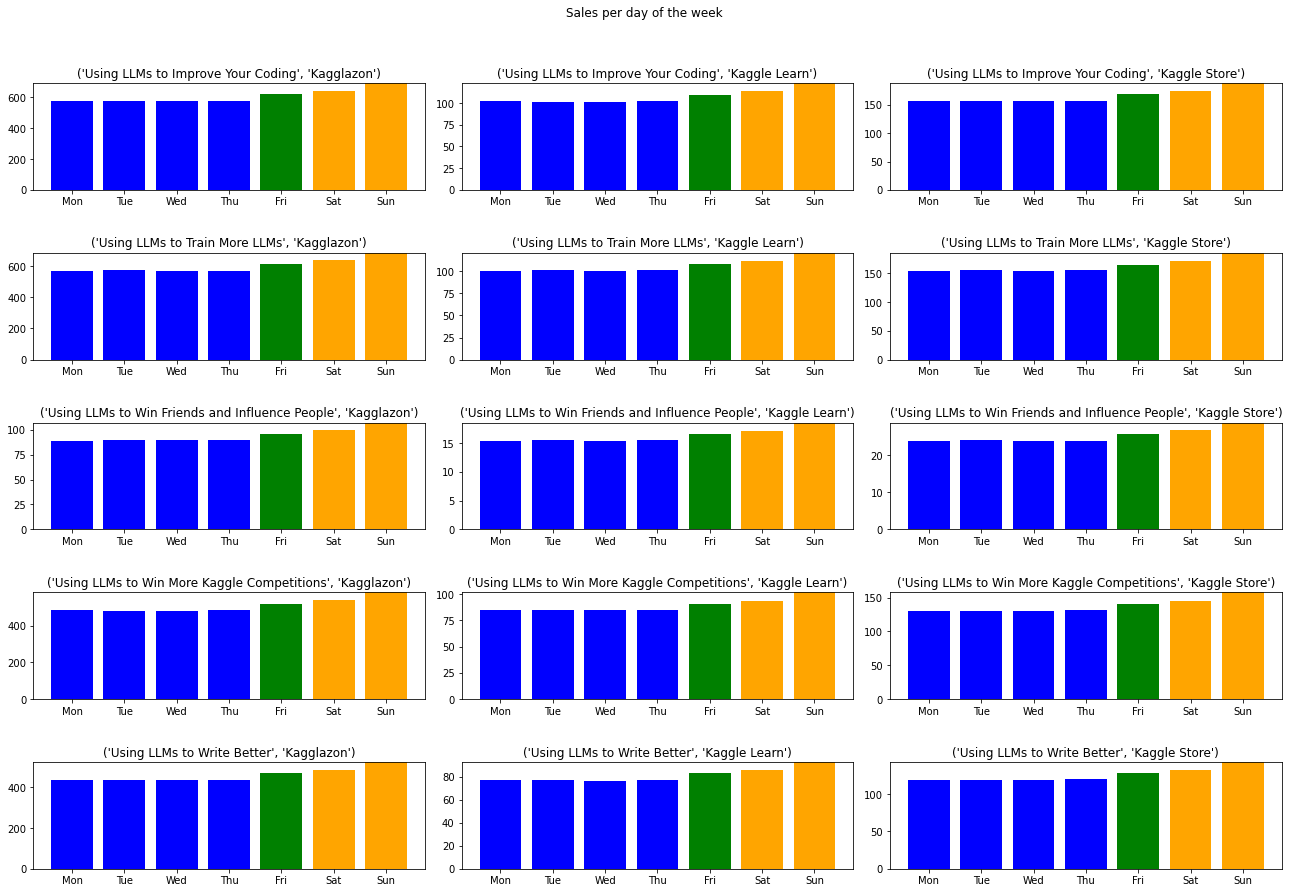

In [375]:
plot_weekday('Japan', train_data)

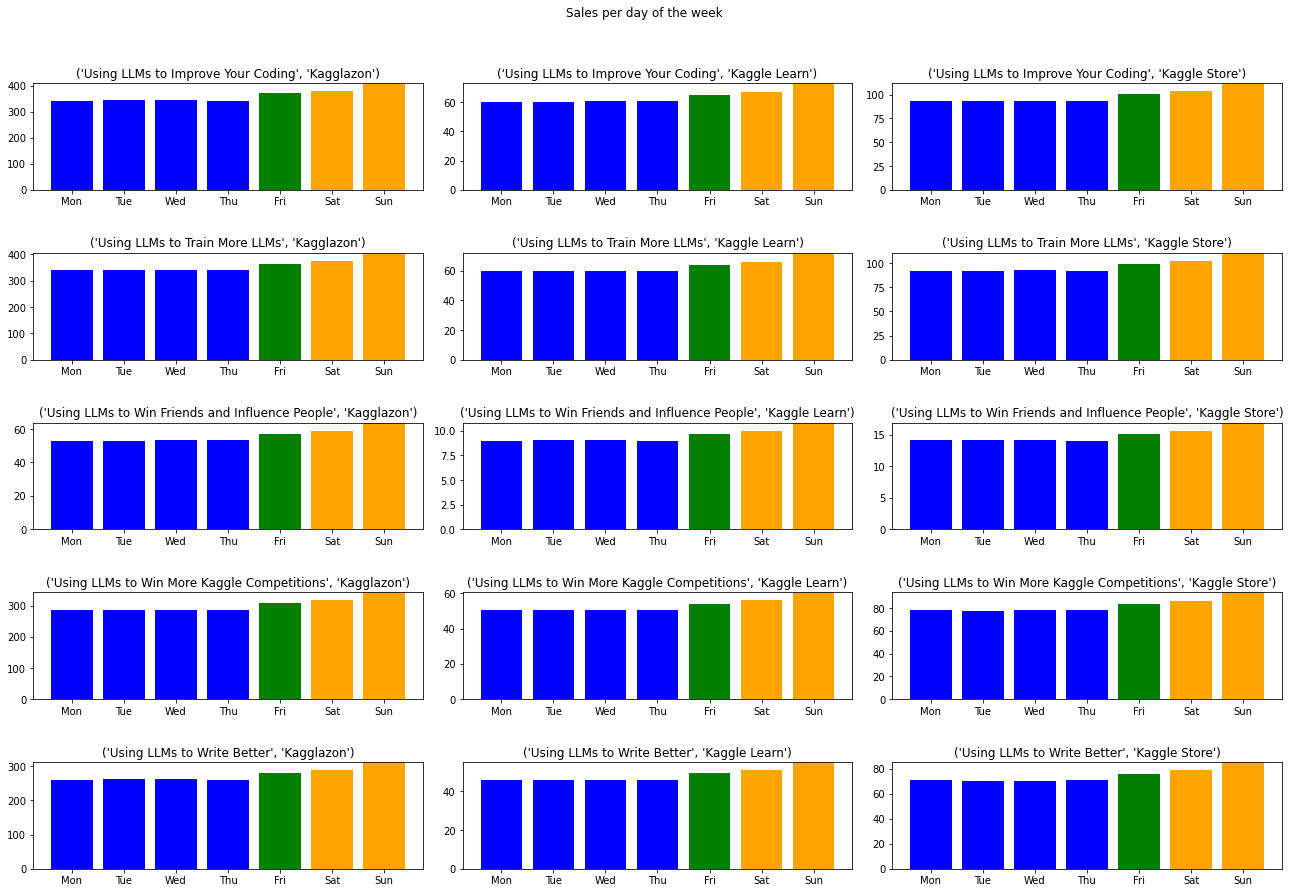

In [376]:
plot_weekday('Estonia', train_data)

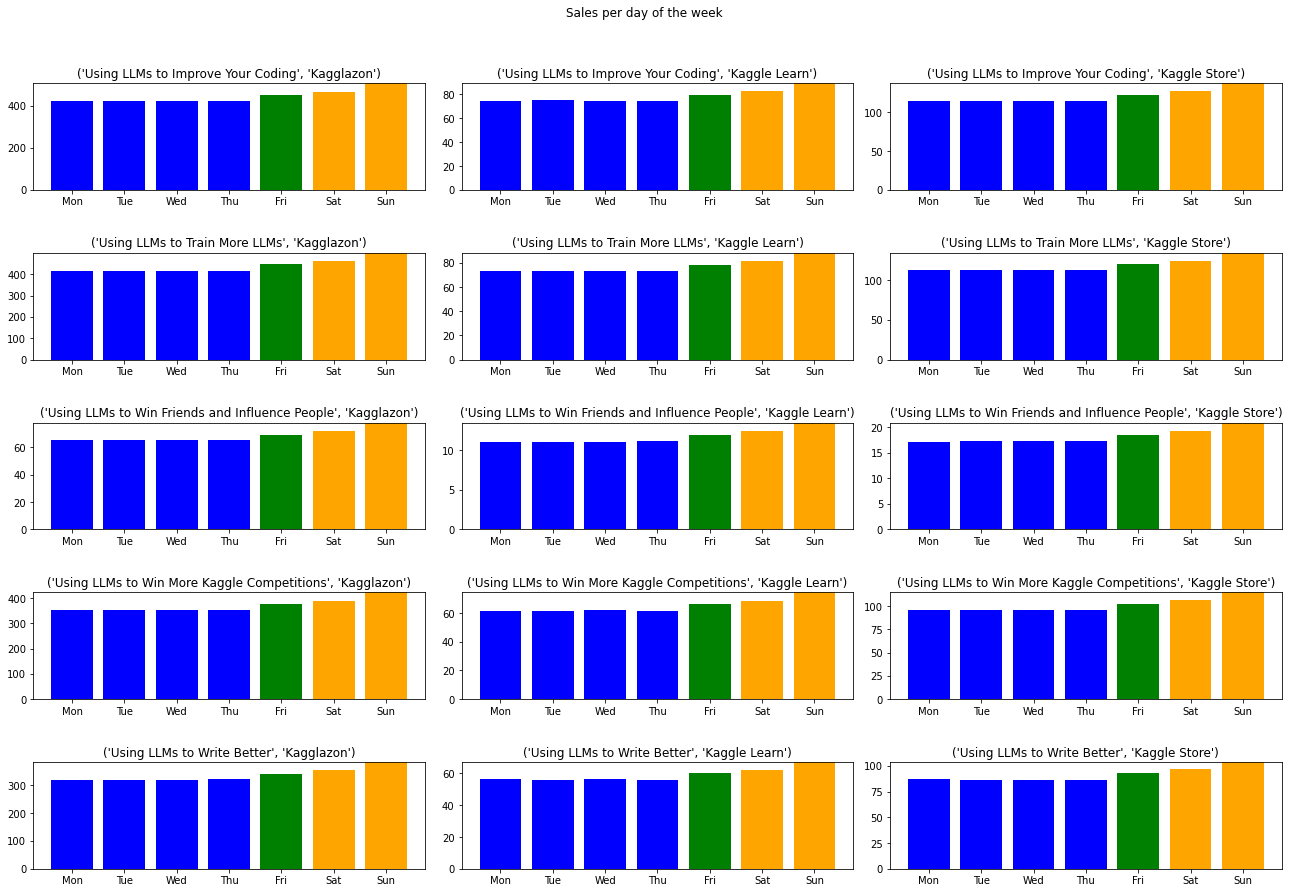

In [377]:
plot_weekday('Spain', train_data)

Overall in each country, there is an increasing sales trend during friday and weekends.

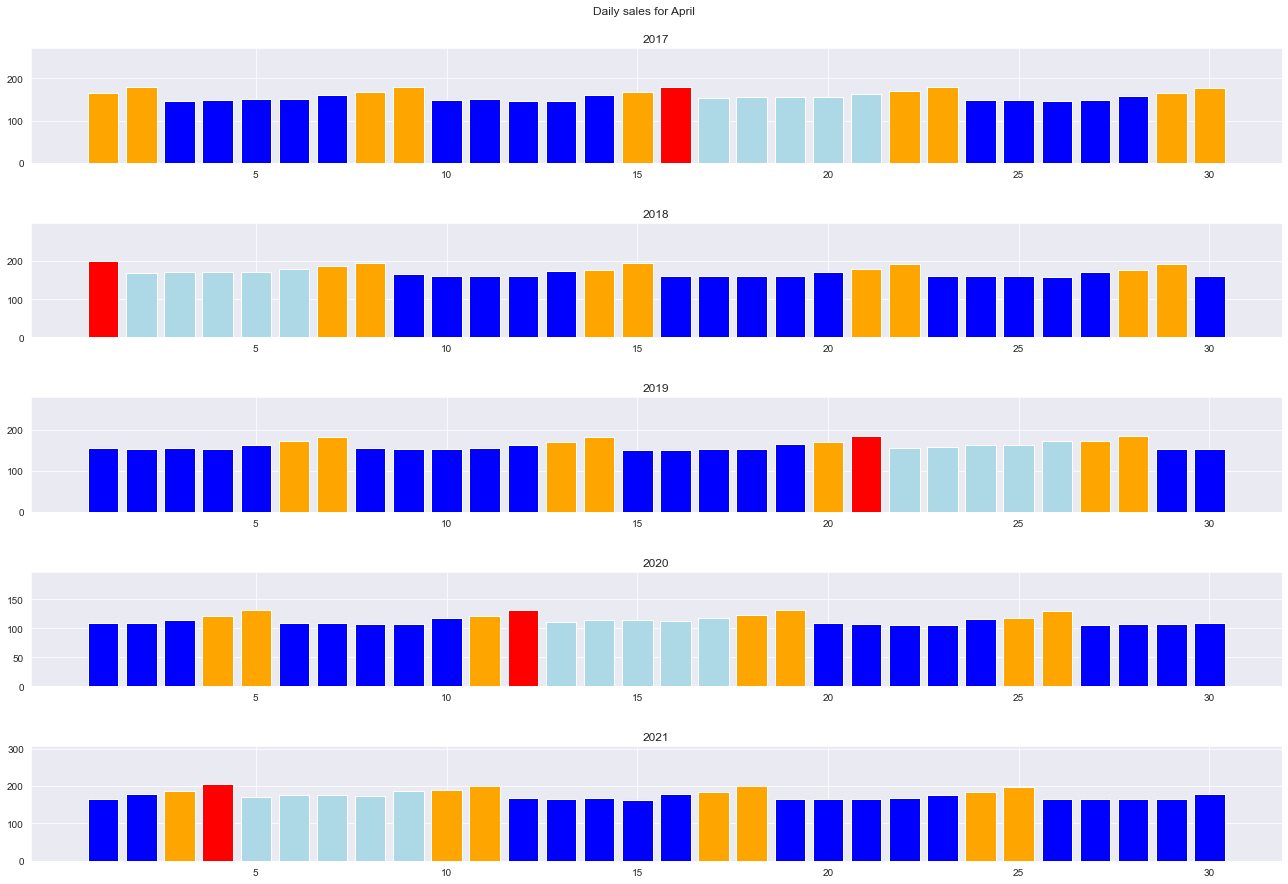

In [304]:
from dateutil.easter import easter
plt.figure(figsize=(18, 12))
for i, (year, df) in enumerate(train_data.groupby(train_data.date.dt.year)):
    df = df.reset_index(drop=True)
    ax = plt.subplot(5, 1, i+1, ymargin=0.5)
    april = df.num_sold[(df.date.dt.month==4)].groupby(df.date.dt.day).mean()
    date_range = pd.date_range(start=f'{year}-04-01', end=f'{year}-04-30', freq='D')
    easter_date = easter(year)
    color = []
    for d in date_range:
        if d == pd.to_datetime(easter_date):
            color.append('r')
        elif (d.date() - easter_date).days in range(6):
            color.append('lightblue')
        elif d.dayofweek < 5:
            color.append('b')
        else:
            color.append('orange')
#     color = ['r' if (d == easter_date) else 
#              'lightblue' if ((d.date() - easter_date).days in range(6)) 
#              else 'b' if (d.dayofweek < 5) else 'orange' for d in date_range]
    ax.bar(range(1, 31),
           april,
           color=color)
    ax.set_title(str(year))
    ax.set_xticks(ticks=range(5, 31, 5))
plt.tight_layout(h_pad=3.0)
plt.suptitle('Daily sales for April', y=1.02)
plt.show()

The sales are slightly higher during easter. However, the impact of easter season is not significant. It looks like the sales are similar to the other days in different week.